# CONFIGURAÇÕES

In [1]:
import os
import sys
import importlib
from pathlib import Path

import pandas as pd
import geopandas as gpd

import numpy as np



import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx

In [2]:
import mapclassify as mc

In [3]:
import folium

In [4]:
print(gpd.options.io_engine)

None


In [5]:
gpd.options.io_engine = "pyogrio"
# os.environ["PYOGRIO_USE_ARROW"] = "0"


In [6]:
from pyogrio import list_layers

In [7]:
import libpysal

## CONFIG R
R RHOME should be in our environment variables

In addition: to create "code blocks" with an r kernel consider to install the IRKernel!
For that, you should go to the terminal prompt (miniforge) and execute R, then, in R terminal you should install IRKernel with the following comand: 

First command:
```
R
```
Second command:
``` R
install.packages("IRkernel", repos = "https://cloud.r-project.org")
```
Third command:
``` R
IRkernel::installspec(user = FALSE)
```

After this, it is possible to create a notebook with R kernel on the code blocks

In [8]:
# Fetch the CONDA_PREFIX environment variable
conda_prefix = os.environ.get('CONDA_PREFIX')
conda_prefix

'C:\\Users\\paulo\\.conda\\envs\\projETE2425_withR'

In [9]:
os.environ['R_HOME'] = os.path.abspath(os.path.join(conda_prefix + r'\lib\R'))

In [10]:
%load_ext rpy2.ipython

c:\Users\paulo\.conda\envs\projETE2425_withR\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [ ]:
# import rpy2

## Definição da diretoria de trabalho na directoria raiz do projeto

In [13]:
from pathlib import Path

# Find the project root (assuming marker-based or script-relative path)
def find_project_root(marker="README.md"):
    current_dir = Path.cwd()
    while current_dir != current_dir.parent:  # Traverse up until root
        if (current_dir / marker).exists():
            return current_dir
        current_dir = current_dir.parent
    raise FileNotFoundError(f"Marker '{marker}' not found in any parent directory.")

project_root = find_project_root()
sys.path.append(str(project_root)) 

# Or use a relative path: project_root = Path(__file__).resolve().parent.parent
os.chdir(project_root)
print(f"Working directory set to: {project_root}")

Working directory set to: c:\Users\paulo\OneDrive\ONEDRIVE_CLOUD_DISK\TRABALHO_AULAS\AL20242025\2SEM\ETE_2425\TP\projETE2425


## ADD our own library to the libraries paths

In [14]:
module_path = os.path.abspath(os.path.join(r'.\src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
module_path

'c:\\Users\\paulo\\OneDrive\\ONEDRIVE_CLOUD_DISK\\TRABALHO_AULAS\\AL20242025\\2SEM\\ETE_2425\\TP\\projETE2425\\src'

In [16]:
import utils.utils_ete2425

# Preprocessamento

### Base de Dados do mercado de habitação de Aveiro - Ílhavo 

Origem dos dados: Amostra de dados disponibilizada pela empresa PrimeYield com base numa recolha (seletiva)de dados de habitações disponíveis para venda nos municipios de Aveiro e Ílhavo. Os dados correspondem a registos obtidos no período de Janeiro de 2018 a Fevereiro de 2023 <p>

NOTA: A base de dados disponibilizada não é representativa do mercado de habitação da área de estudo, tendo um propósito meramente pedagógico. 

In [18]:
# Leitura dos dados
db_HousingMarket_AvrIlh_Ori = pd.read_csv(r'.\data\input\Housing_Market_AveiroIlhavo\db_Housing_AvrIlh_F.csv', encoding = "ISO-8859-1") #encoding = "ISO-8859-1"
print(db_HousingMarket_AvrIlh_Ori.shape)
db_HousingMarket_AvrIlh_Ori[:3]

(674, 11)


,ID,Nature,Typology,Status,Price,A,Year,SOURCE_ID,Construc_Year,Longitude,Latitude
0,106045,1,4,4,80000.0,130.0,2018,2.0,1998,-8.653580,40.640789
1,106260,1,4,4,125000.0,109.0,2018,2.0,1989,-8.650984,40.639831
2,1963595,2,6,4,259000.0,250.0,2022,5.0,1951,-8.545166,40.619799


# TRANSFERIR DADOS (DATAFRAMES) ENTRE R E PYTHON

In [43]:
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects
pandas2ri.activate()



In [44]:
db_HousingMarket_AvrIlh_Ori_r_df = pandas2ri.py2rpy(db_HousingMarket_AvrIlh_Ori)

# Convert and assign the R object to R's global environment
robjects.globalenv['db_HousingMarket_AvrIlh_Ori_r_df'] = pandas2ri.py2rpy(db_HousingMarket_AvrIlh_Ori)



In [45]:
%%R
summary(db_HousingMarket_AvrIlh_Ori_r_df)

 [1] "Min.   :  99831  " "1st Qu.:1164845  " "Median :1447746  "
 [4] "Mean   :1303461  " "3rd Qu.:1785982  " "Max.   :2005854  "
 [7] "Min.   :1.000  "   "1st Qu.:1.000  "   "Median :1.000  "  
[10] "Mean   :1.409  "   "3rd Qu.:2.000  "   "Max.   :2.000  "  
[13] "Min.   :1.000  "   "1st Qu.:3.000  "   "Median :4.000  "  
[16] "Mean   :3.856  "   "3rd Qu.:5.000  "   "Max.   :7.000  "  
[19] "Min.   :1.000  "   "1st Qu.:3.000  "   "Median :3.000  "  
[22] "Mean   :3.163  "   "3rd Qu.:4.000  "   "Max.   :4.000  "  
[25] "Min.   :  40000  " "1st Qu.: 125000  " "Median : 185000  "
[28] "Mean   : 222841  " "3rd Qu.: 275000  " "Max.   :1600000  "
[31] "Min.   :  26.0  "  "1st Qu.:  86.0  "  "Median : 120.0  " 
[34] "Mean   : 149.9  "  "3rd Qu.: 190.0  "  "Max.   :1109.0  " 
[37] "Min.   :2018  "    "1st Qu.:2020  "    "Median :2021  "   
[40] "Mean   :2020  "    "3rd Qu.:2021  "    "Max.   :2023  "   
[43] "Min.   :2  "       "1st Qu.:4  "       "Median :4  "      
[46] "Mean   :4  "       

#### Ler dados de informação espacial (Delimitações territoriais à escala local)

<Axes: >

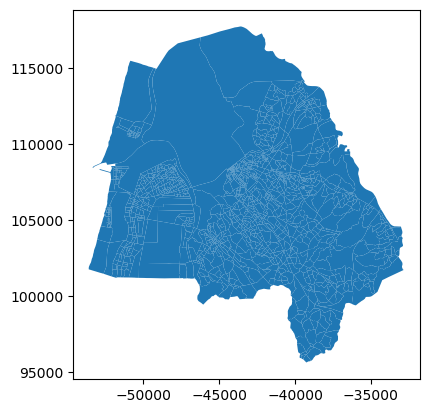

In [14]:
AVRILH_BGRI2021 = gpd.read_file(r'.\data\input\geopackage_ETE2425.gpkg', layer='BGRI2021_0105e0110')
AVRILH_BGRI2021.plot()

<Axes: >

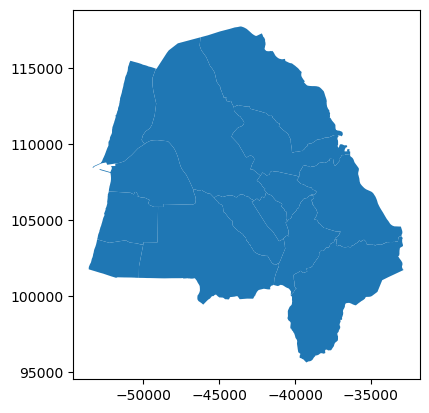

In [15]:
AVRILH_CAOP2018_FREG = gpd.read_file( r'.\data\input\geopackage_ETE2425.gpkg', layer = "AE_AVRILH_CAOP2018_FREG")
AVRILH_CAOP2018_FREG.plot()

<Axes: >

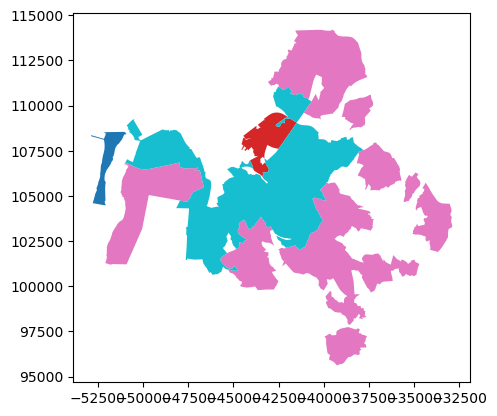

In [16]:
AE_AVRILH_MESO_4UTs = gpd.read_file(r'.\data\input\geopackage_ETE2425.gpkg', layer = "AE_AVRILH_MESO_4UTs_M2")
AE_AVRILH_MESO_4UTs.plot(column= 'MACROZONA4')

In [17]:
AE_AVRILH_MESO_4UTs.MACROZONA4.unique()

array(['Beaches', 'Center', 'Rural', 'Suburban'], dtype=object)

In [18]:
AE_AVRILH_MACRO_12UTs = gpd.read_file(r'.\data\input\geopackage_ETE2425.gpkg', layer = "AE_AVRILH_MACRO_12UTs")
AE_AVRILH_MACRO_12UTs.columns

Index(['spss_clust', 'MACROZONAS12', 'geometry'], dtype='object')

In [19]:
AE_AVRILH_MACRO_12UTs.MACROZONAS12.unique()

array(['MixedF01', 'MixedF02', 'MixedF03', 'MixedF04', 'MixedF05',
       'MixedF06', 'MixedF07', 'MixedF08', 'MixedF09', 'MixedF10',
       'MixedF11', 'MixedF12'], dtype=object)

<Axes: >

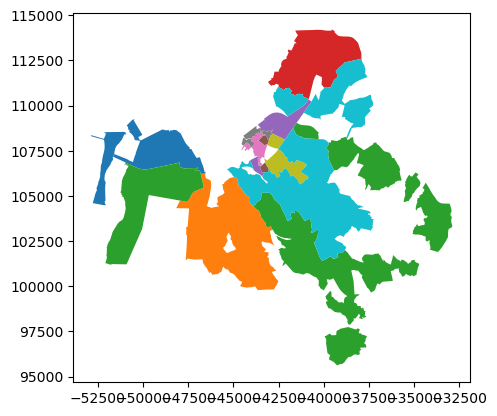

In [20]:
AE_AVRILH_MACRO_12UTs.plot(column='MACROZONAS12')

<Axes: >

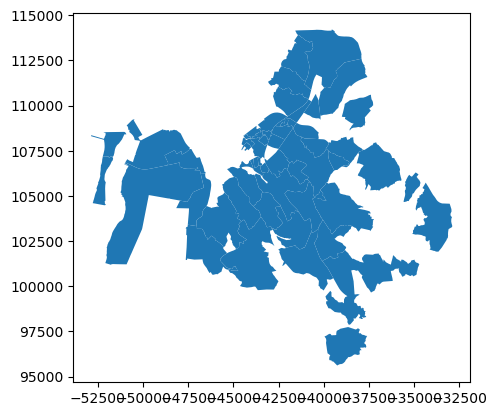

In [21]:
AE_AVRILH_MICRO_50UTs = gpd.read_file(r'.\data\input\geopackage_ETE2425.gpkg', layer = "AE_AVRILH_MICRO_50UTs")
AE_AVRILH_MICRO_50UTs.plot()

In [22]:
AE_AVRILH_MICRO_50UTs=AE_AVRILH_MICRO_50UTs.rename(columns = {'MACROZONA4':'MACROZONA4_'})

<Axes: >

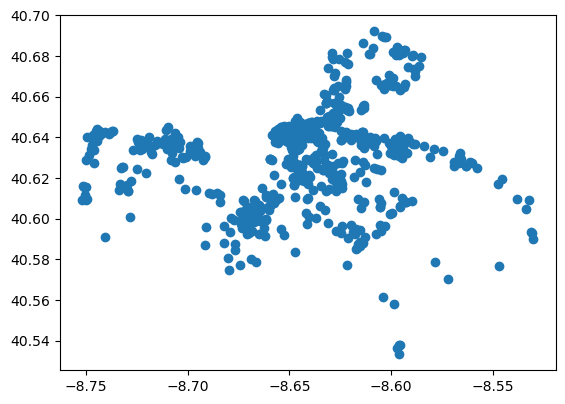

In [23]:
gdf_HousingMarket_AvrIlh = gpd.GeoDataFrame(db_HousingMarket_AvrIlh_Ori, geometry=gpd.points_from_xy(db_HousingMarket_AvrIlh_Ori.Longitude , db_HousingMarket_AvrIlh_Ori.Latitude))
gdf_HousingMarket_AvrIlh = gdf_HousingMarket_AvrIlh.drop(columns=['Longitude','Latitude'])
gdf_HousingMarket_AvrIlh.plot()

In [24]:
gdf_HousingMarket_AvrIlh = gdf_HousingMarket_AvrIlh.set_crs("EPSG:4326")
gdf_HousingMarket_AvrIlh.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
gdf_HousingMarket_AvrIlh = gdf_HousingMarket_AvrIlh.to_crs("EPSG:3763")

In [26]:
AE_AVRILH_limite = AE_AVRILH_MESO_4UTs.geometry.unary_union

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\2830820997.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  AE_AVRILH_limite = AE_AVRILH_MESO_4UTs.geometry.unary_union


<Axes: >

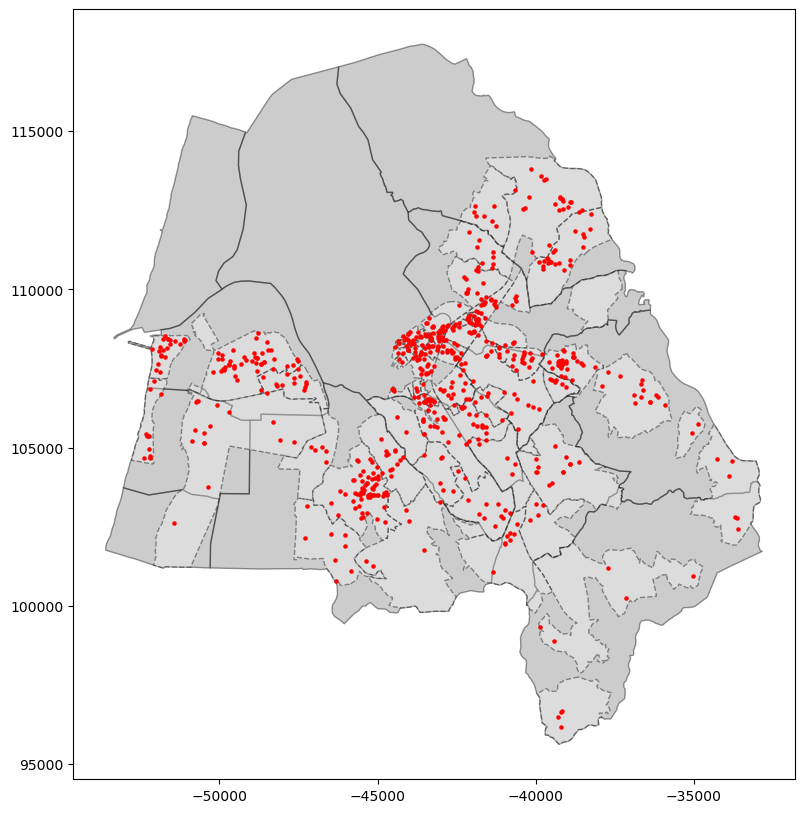

In [27]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.set_aspect('equal')
gdf_HousingMarket_AvrIlh.plot(ax=ax,zorder=3, 
                      marker='.', 
                      color='red', 
                      markersize=20)
AE_AVRILH_MICRO_50UTs.plot(ax=ax, zorder=2, 
                             color='whitesmoke', 
                             edgecolor='black', linewidth=1, 
                             linestyle='--',
                            alpha = 0.4 )

AVRILH_CAOP2018_FREG.plot(ax=ax, zorder=1, 
                             color='grey', 
                             #facecolor="none",
                             edgecolor='black', linewidth=1,
                            alpha = 0.4 )
                        
# ax.set_ylim(95000, 120000)
# ax.set_xlim(-60000,-25000 )

#### Combinar informação espacial

In [28]:
print(list(AVRILH_CAOP2018_FREG.columns) )

['DICOFRE18', 'FREG18_la', 'AREAFREG18', 'MUNICOD', 'MUNI_Name', 'geometry']


In [29]:
print(gdf_HousingMarket_AvrIlh.shape)
gdf_HousingMarket_AvrIlh = gpd.sjoin(gdf_HousingMarket_AvrIlh, AVRILH_CAOP2018_FREG, how="left", predicate='within')
gdf_HousingMarket_AvrIlh.drop(columns='index_right', inplace=True)
print(gdf_HousingMarket_AvrIlh.shape)
gdf_HousingMarket_AvrIlh.head(3)

(674, 10)
(674, 15)


,ID,Nature,Typology,Status,Price,A,Year,SOURCE_ID,Construc_Year,geometry,DICOFRE18,FREG18_la,AREAFREG18,MUNICOD,MUNI_Name
0,106045,1,4,4,80000.0,130.0,2018,2.0,1998,POINT (-44026.912 108117.746),010517,União das freguesias de Glória e Vera Cruz,4.532068e+07,0105,AVEIRO
1,106260,1,4,4,125000.0,109.0,2018,2.0,1989,POINT (-43808 108010.1),010517,União das freguesias de Glória e Vera Cruz,4.532068e+07,0105,AVEIRO
2,1963595,2,6,4,259000.0,250.0,2022,5.0,1951,POINT (-34867.077 105738.234),010515,Eixo e Eirol,2.241555e+07,0105,AVEIRO


## Análise exploratória de dados e pré-processamento

In [30]:
# Leitura dos dados
db_HousingMarket_AvrIlh_Ori = pd.read_csv(r'.\data\input\Housing_Market_AveiroIlhavo\db_Housing_AvrIlh_F.csv', encoding = "ISO-8859-1") #encoding = "ISO-8859-1"
print(db_HousingMarket_AvrIlh_Ori.shape)
db_HousingMarket_AvrIlh_Ori[:3]

(674, 11)


,ID,Nature,Typology,Status,Price,A,Year,SOURCE_ID,Construc_Year,Longitude,Latitude
0,106045,1,4,4,80000.0,130.0,2018,2.0,1998,-8.653580,40.640789
1,106260,1,4,4,125000.0,109.0,2018,2.0,1989,-8.650984,40.639831
2,1963595,2,6,4,259000.0,250.0,2022,5.0,1951,-8.545166,40.619799


### Engenharia de dados I: "enriquecimento" da base de dados com informação espacial

#### Analise e processamento univariado

#### Variáveis contínuais 

##### Variável dependente / alvo - preço (€)

In [31]:
gdf_HousingMarket_AvrIlh['LnPrice'] = np.log(gdf_HousingMarket_AvrIlh["Price"])

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\877443303.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


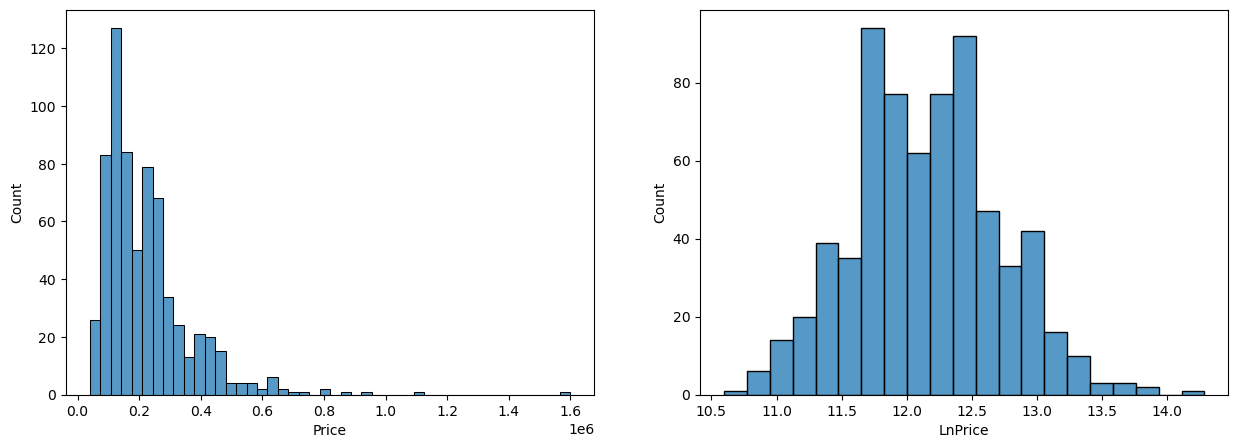

In [32]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="Price", ax=ax[0])
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="LnPrice", ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\1244531959.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


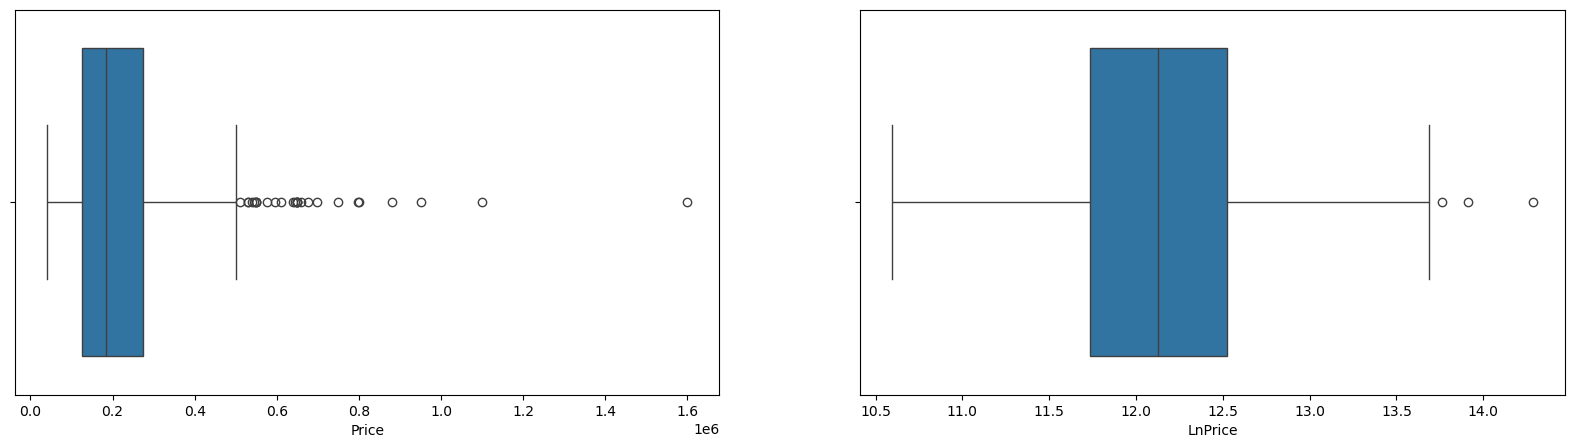

In [33]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.boxplot(x=gdf_HousingMarket_AvrIlh["Price"], ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["LnPrice"], ax=ax[1])
fig.show()

In [34]:
# Quantiles

classi_quant = mc.StdMean(gdf_HousingMarket_AvrIlh['Price'] )
classi_quant

StdMean

        Interval           Count
--------------------------------
(      -inf,  -70981.03] |     0
( -70981.03,   75930.16] |    33
(  75930.16,  369752.53] |   551
( 369752.53,  516663.72] |    64
( 516663.72, 1600000.00] |    26

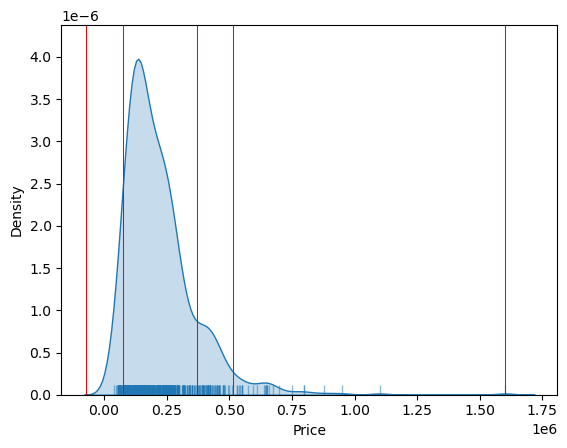

In [35]:
# Código padrão - usa a livraria seaborn (extende a matplotlib )
# https://seaborn.pydata.org/tutorial.html
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(gdf_HousingMarket_AvrIlh['Price'], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(gdf_HousingMarket_AvrIlh['Price'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi_quant.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

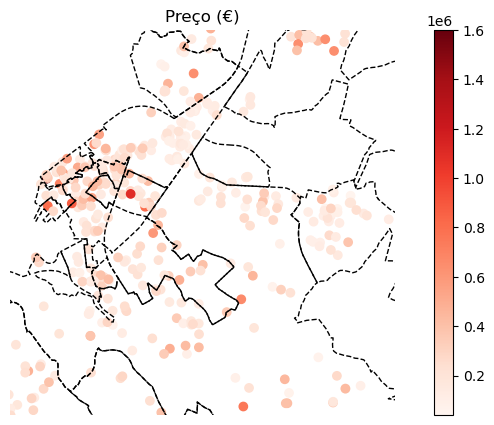

In [36]:
# color maps references: https://matplotlib.org/stable/gallery/color/colormap_reference.html
figura, ax = plt.subplots(1, figsize=(10, 5))
gdf_HousingMarket_AvrIlh.plot(ax=ax,
                              zorder=1,  
                              column='Price',
                              cmap='Reds', 
                              legend=True) 

AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=2,
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           facecolor="none",
                           #alpha = 0.4 
                           #color='whitesmoke',
                           )
ax.set_axis_off()
ax.set_xbound(-45000, -38000 )
ax.set_ybound(111000, 104000)
ax.set_title('Preço (€)')
# plt.axis('equal')
plt.show()

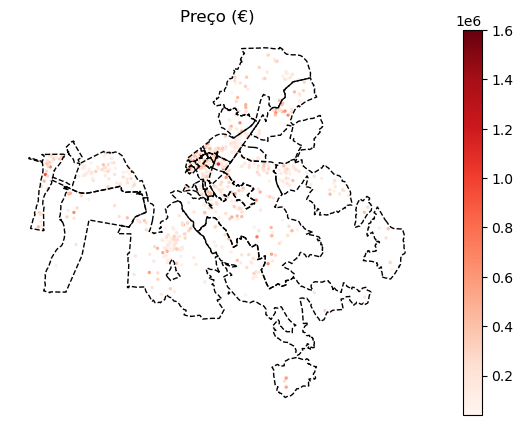

In [37]:
# color maps references: https://matplotlib.org/stable/gallery/color/colormap_reference.html
figura, ax = plt.subplots(1, figsize=(10, 5))
gdf_HousingMarket_AvrIlh.plot(ax=ax,
                              zorder=1,  
                              column='Price',
                              markersize=2,
                              cmap=plt.cm.Reds, 
                              legend=True) 

AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=2,
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           facecolor="none",
                           #alpha = 0.4 
                           #color='whitesmoke',
                        )
ax.set_axis_off()
ax.set_title('Preço (€)')
# plt.axis('equal')
plt.show()

##### Variável independente - área

In [38]:
gdf_HousingMarket_AvrIlh['LnA'] = np.log(gdf_HousingMarket_AvrIlh["A"])

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\1915460742.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


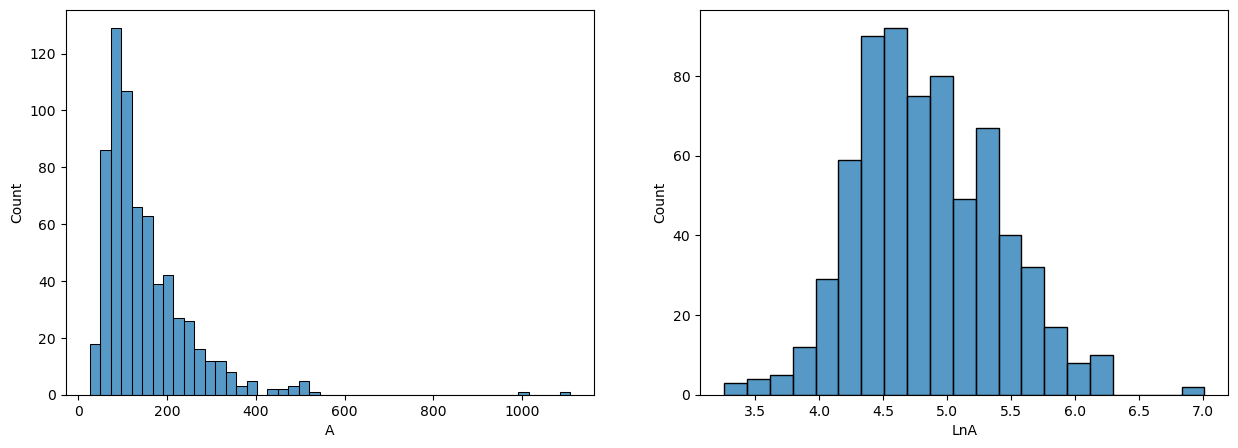

In [39]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="A", ax=ax[0])
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="LnA", ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\277307012.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


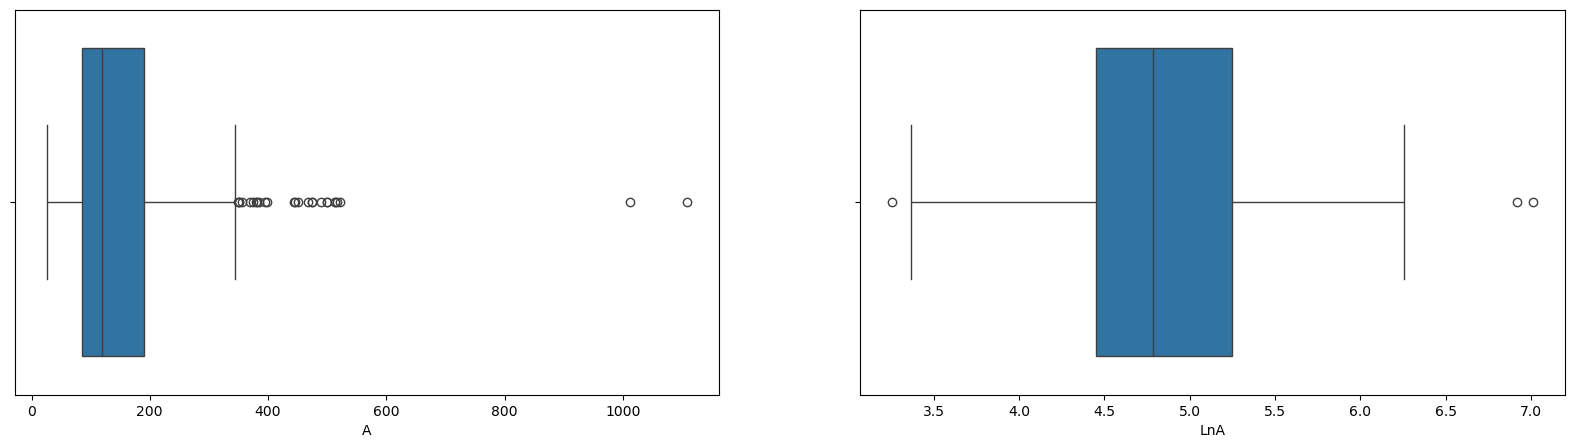

In [40]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.boxplot(x=gdf_HousingMarket_AvrIlh["A"], ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["LnA"], ax=ax[1])
fig.show()

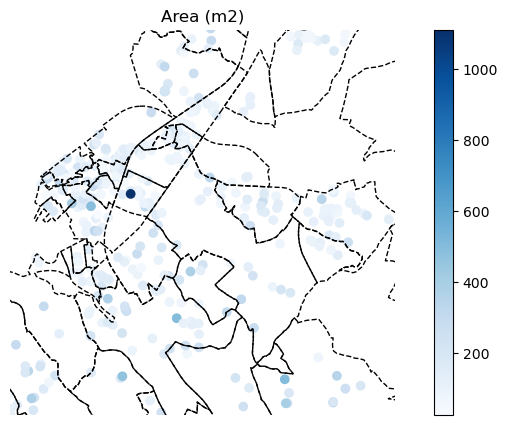

In [41]:
# color maps references: https://matplotlib.org/stable/gallery/color/colormap_reference.html
figura, ax = plt.subplots(1, figsize=(10, 5))
gdf_HousingMarket_AvrIlh.plot(ax=ax,
                              zorder=1,  
                              column='A',
                              cmap='Blues', 
                              legend=True) 

AE_AVRILH_MICRO_50UTs.plot(ax=ax, 
                           zorder=2,
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           facecolor="none",
                           #alpha = 0.4 
                           #color='whitesmoke',
                        )
ax.set_axis_off()
ax.set_xbound(-45000, -38000 )
ax.set_ybound(111000, 104000)
ax.set_title('Area (m2)')
# plt.axis('equal')
plt.show()

##### Preço + Area

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\2193284439.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


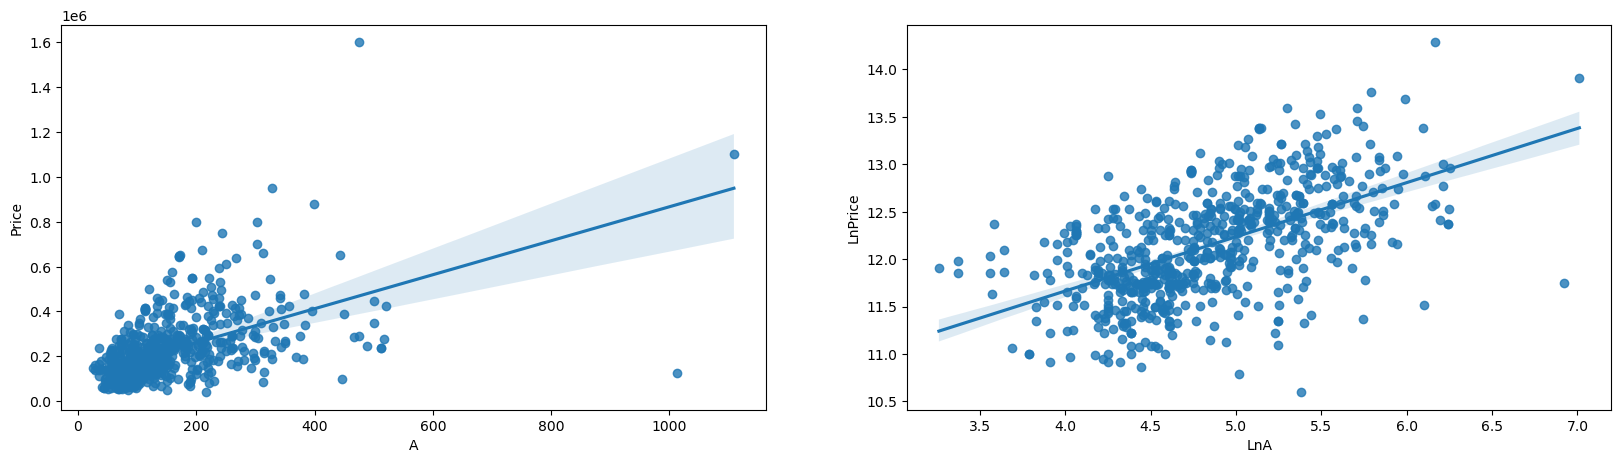

In [42]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.regplot(data=gdf_HousingMarket_AvrIlh, x="A", y="Price", ax=ax[0])
sns.regplot(data=gdf_HousingMarket_AvrIlh, x="LnA", y="LnPrice", ax=ax[1])
fig.show()

##### Variável dependente Preço/m2

In [43]:
gdf_HousingMarket_AvrIlh['PriceM2'] = gdf_HousingMarket_AvrIlh["Price"]/gdf_HousingMarket_AvrIlh["A"]
gdf_HousingMarket_AvrIlh['LnPriceM2'] = np.log(gdf_HousingMarket_AvrIlh['PriceM2'] )

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\4208540412.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


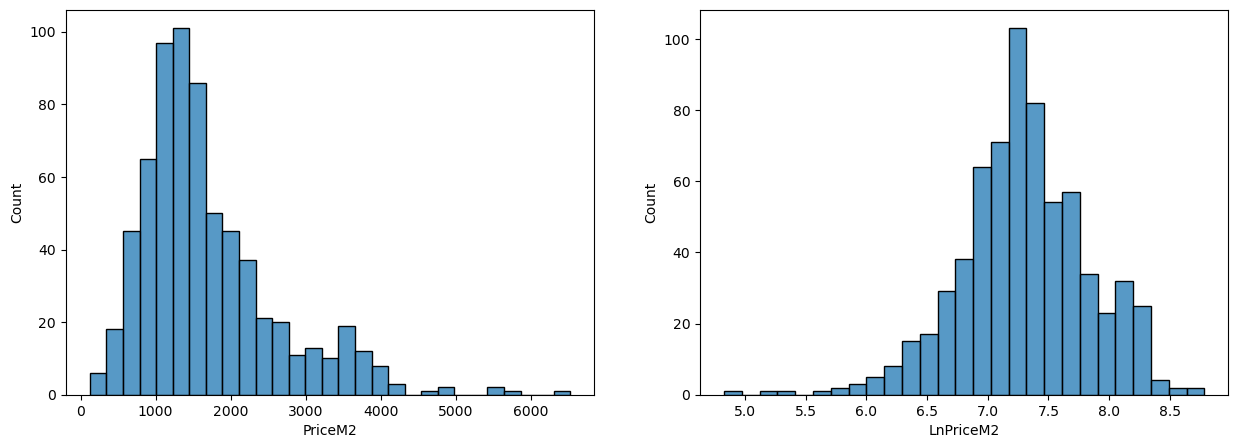

In [44]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="PriceM2", ax=ax[0])
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="LnPriceM2", ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\2290764819.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


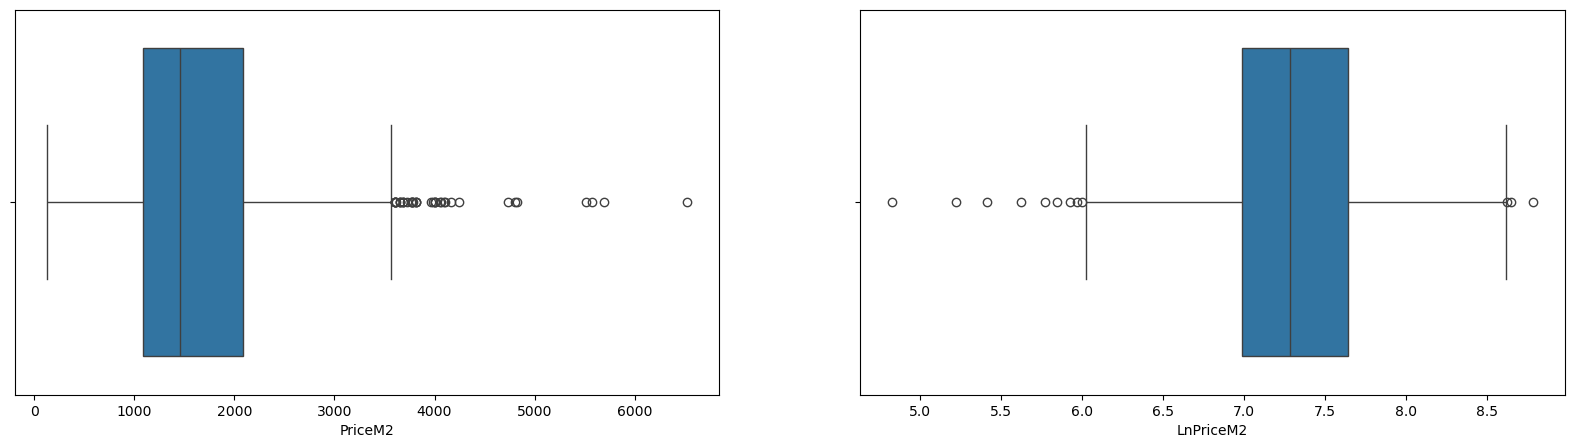

In [45]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.boxplot(x=gdf_HousingMarket_AvrIlh["PriceM2"], ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["LnPriceM2"], ax=ax[1])
fig.show()

In [46]:
# Quantiles

classi_quant = mc.StdMean(gdf_HousingMarket_AvrIlh['PriceM2'] )
classi_quant

StdMean

     Interval        Count
--------------------------
(   -inf, -133.33] |     0
(-133.33,  781.11] |    67
( 781.11, 2610.00] |   512
(2610.00, 3524.44] |    51
(3524.44, 6527.78] |    44

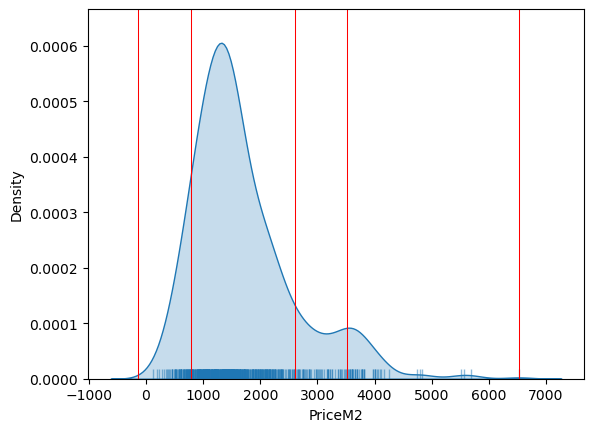

In [47]:
# Código padrão - usa a livraria seaborn (extende a matplotlib )
# https://seaborn.pydata.org/tutorial.html
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(gdf_HousingMarket_AvrIlh['PriceM2'], fill=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(gdf_HousingMarket_AvrIlh['PriceM2'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi_quant.bins:
    plt.axvline(cut, color='red', linewidth=0.75)

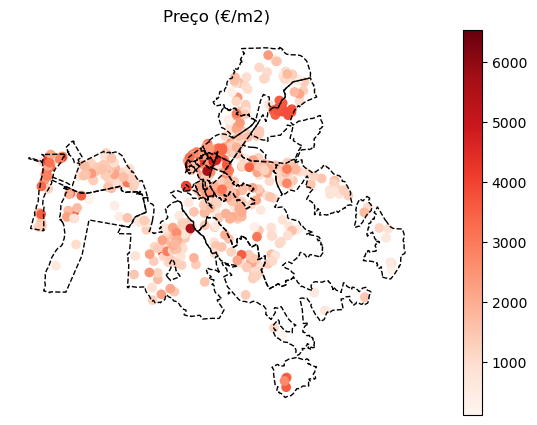

In [48]:
# color maps references: https://matplotlib.org/stable/gallery/color/colormap_reference.html
figura, ax = plt.subplots(1, figsize=(10, 5))
gdf_HousingMarket_AvrIlh.plot(ax=ax,
                              zorder=1,  
                              column='PriceM2',
                              cmap='Reds', 
                              legend=True) 

AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=2, 
                           facecolor="none", 
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           #color='whitesmoke',
                           #alpha = 0.4 
                           
                           )
ax.set_axis_off()

ax.set_title('Preço (€/m2)')
# plt.axis('equal')
plt.show()

##### Remover outliers (Preço & Área)

In [49]:
# Q1 = gdf_HousingMarket_AvrIlh['PriceM2'].quantile(0.25)
# Q3 = gdf_HousingMarket_AvrIlh['PriceM2'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (gdf_HousingMarket_AvrIlh['PriceM2'] >= Q1 - 1.5 * IQR) & (gdf_HousingMarket_AvrIlh['PriceM2'] <= Q3 + 1.5 *IQR)
# gdf_HousingMarket_AvrIlh = gdf_HousingMarket_AvrIlh.loc[filter]  

In [50]:
Q1 = gdf_HousingMarket_AvrIlh['A'].quantile(0.25)
Q3 = gdf_HousingMarket_AvrIlh['A'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (gdf_HousingMarket_AvrIlh['A'] >= Q1 - 1.5 * IQR) & (gdf_HousingMarket_AvrIlh['A'] <= Q3 + 1.5 *IQR)
gdf_HousingMarket_AvrIlh = gdf_HousingMarket_AvrIlh.loc[filter]  

In [51]:
gdf_HousingMarket_AvrIlh.shape

(648, 19)

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\270325329.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


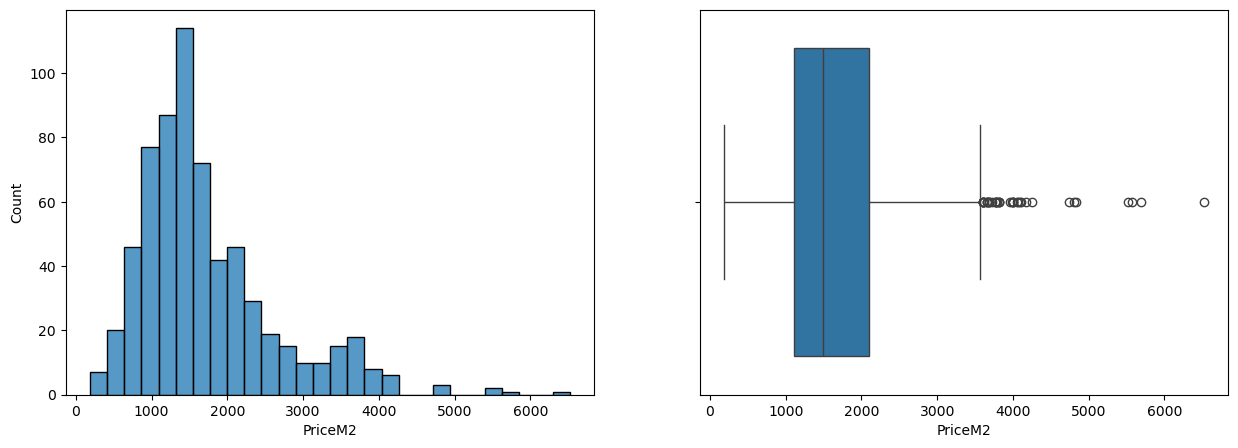

In [52]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="PriceM2", ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["PriceM2"], ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\700133640.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


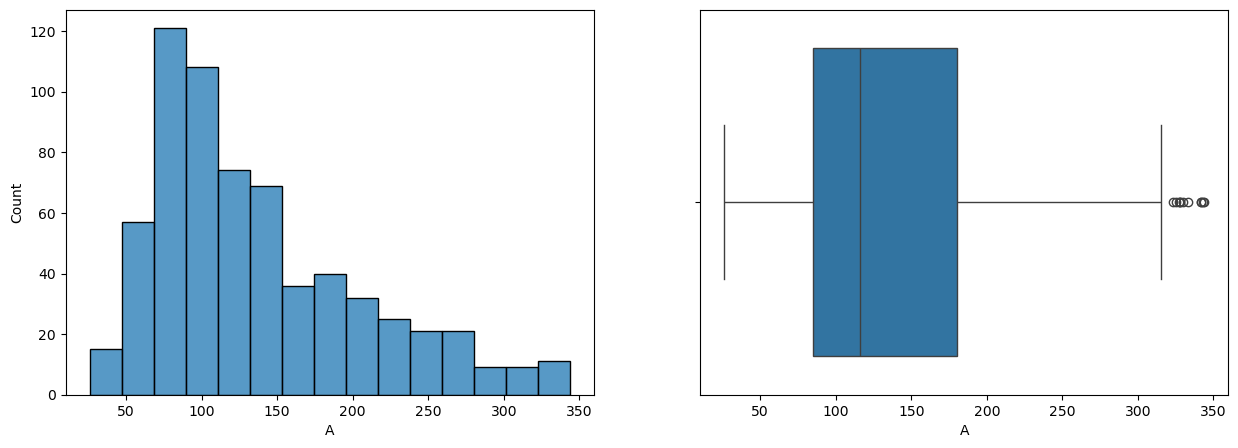

In [53]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="A", ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["A"], ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\1537772295.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


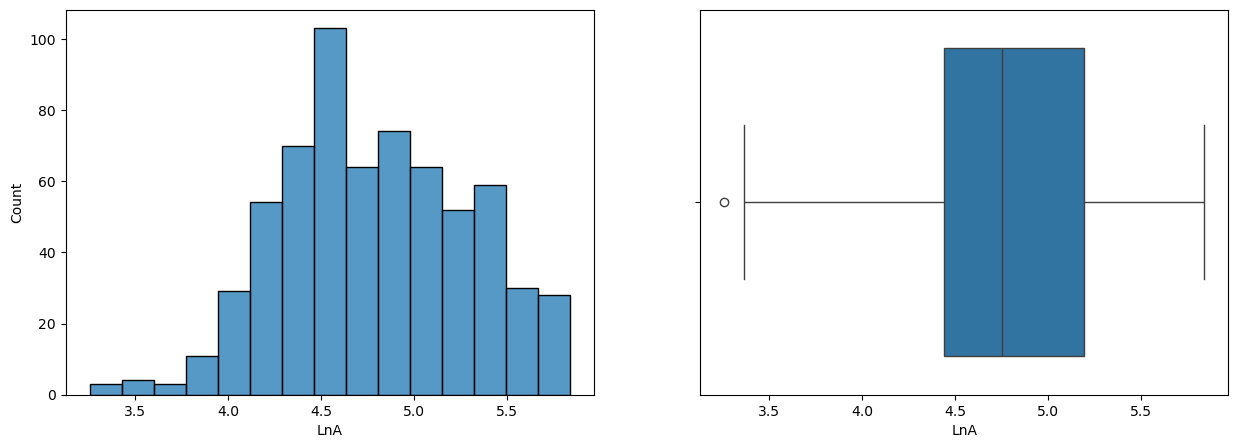

In [54]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="LnA", ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["LnA"], ax=ax[1])
fig.show()

<Axes: xlabel='LnA', ylabel='LnPriceM2'>

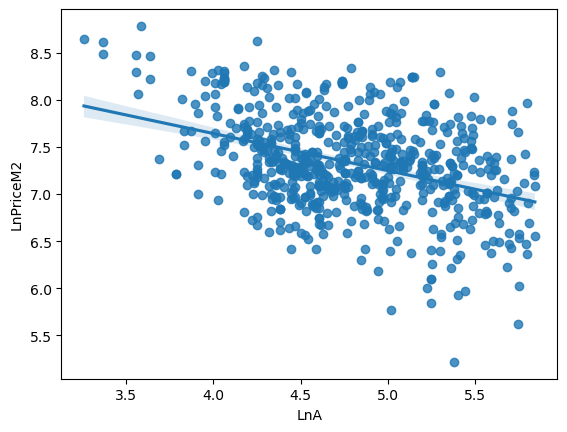

In [55]:
sns.regplot(data=gdf_HousingMarket_AvrIlh, x="LnA", y="LnPriceM2")

##### Variável NQuartos (Tipologia)

In [56]:
gdf_HousingMarket_AvrIlh['Typology'].unique()

array([4, 6, 5, 3, 1, 2, 7])

In [57]:
gdf_HousingMarket_AvrIlh['LnTypology'] = np.log(gdf_HousingMarket_AvrIlh["Typology"])

c:\Users\paulo\.conda\envs\projETE2425_withR\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: xlabel='Typology', ylabel='Count'>

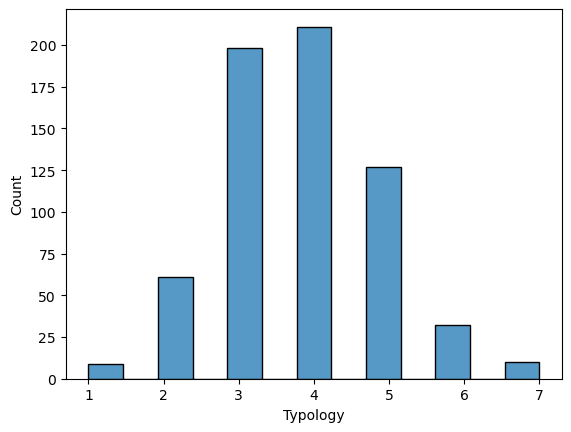

In [58]:
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="Typology")


<Axes: xlabel='Typology', ylabel='LnPriceM2'>

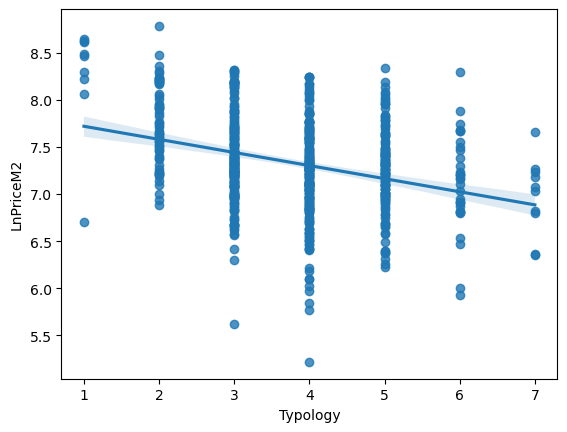

In [59]:
sns.regplot(data=gdf_HousingMarket_AvrIlh, x="Typology", y="LnPriceM2")

<Axes: xlabel='Typology', ylabel='LnA'>

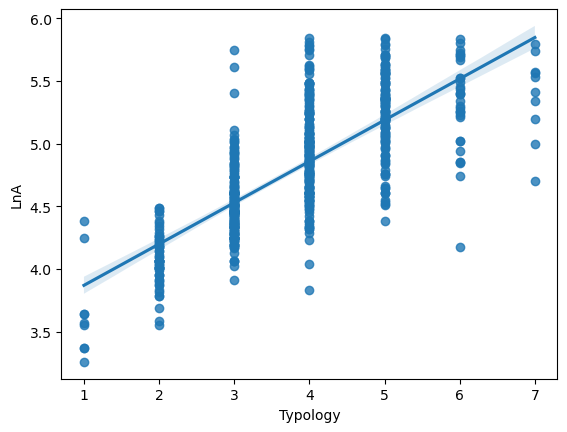

In [60]:
sns.regplot(data=gdf_HousingMarket_AvrIlh, x="Typology", y="LnA")

##### Variável idade do imóvel

In [61]:
gdf_HousingMarket_AvrIlh['Construc_Year'].isna().sum()

np.int64(0)

In [62]:
gdf_HousingMarket_AvrIlh.groupby('Construc_Year')['ID'].count()

Construc_Year
1900     7
1918     1
1928     1
1934     1
1950     4
        ..
2019     6
2020    12
2021    16
2022    41
2023    21
Name: ID, Length: 64, dtype: int64

In [63]:
gdf_HousingMarket_AvrIlh['Idade'] = (2024 - gdf_HousingMarket_AvrIlh['Construc_Year'])

In [64]:
gdf_HousingMarket_AvrIlh['Idade'] 

0      26
1      35
2      73
3      73
4      10
       ..
669    21
670    56
671    17
672    34
673    21
Name: Idade, Length: 648, dtype: int64

In [65]:
np.log(gdf_HousingMarket_AvrIlh["Idade"])

0      3.258097
1      3.555348
2      4.290459
3      4.290459
4      2.302585
         ...   
669    3.044522
670    4.025352
671    2.833213
672    3.526361
673    3.044522
Name: Idade, Length: 648, dtype: float64

In [66]:
gdf_HousingMarket_AvrIlh['LnIdade'] = np.log(gdf_HousingMarket_AvrIlh["Idade"])

In [67]:
gdf_HousingMarket_AvrIlh['Idade'].isna().sum()

np.int64(0)

In [68]:
np.isinf(gdf_HousingMarket_AvrIlh['LnIdade']).values.any()

np.False_

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\2169128395.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


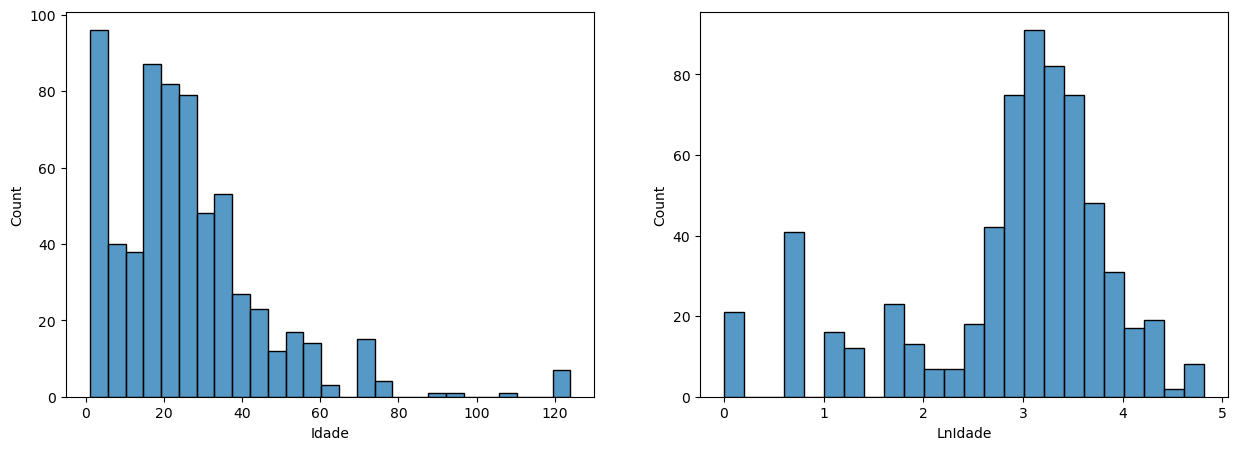

In [69]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="Idade", ax=ax[0])
sns.histplot(data=gdf_HousingMarket_AvrIlh, x="LnIdade", ax=ax[1])
fig.show()

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\2979971259.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


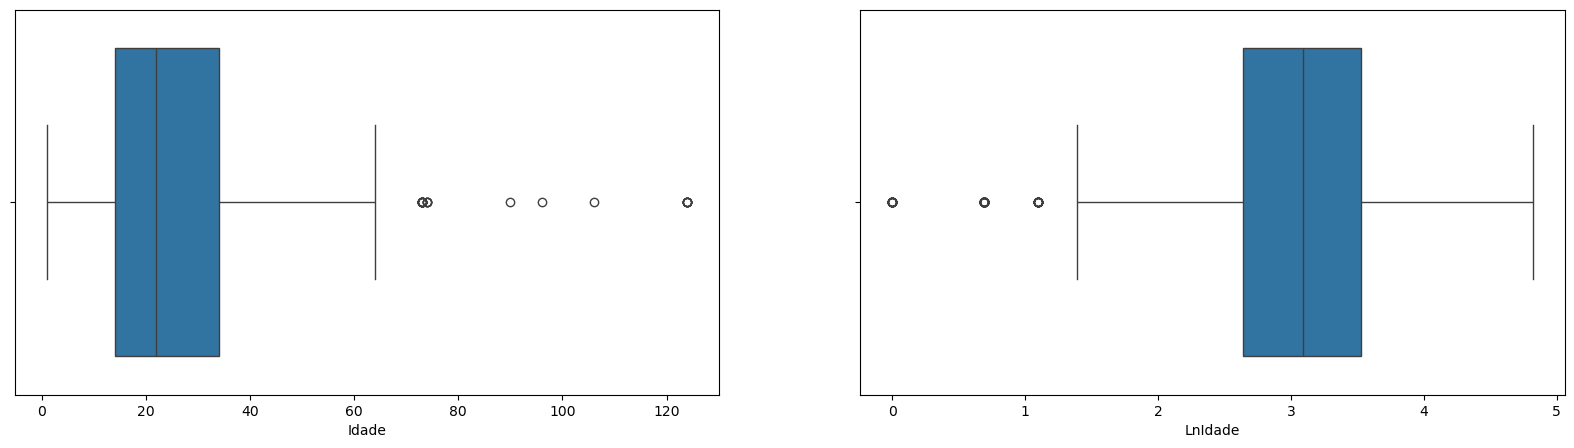

In [70]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.boxplot(x=gdf_HousingMarket_AvrIlh["Idade"], ax=ax[0])
sns.boxplot(x=gdf_HousingMarket_AvrIlh["LnIdade"], ax=ax[1])
fig.show()

#### Variáveis categóricas

##### Variável independente - preservação

In [71]:
gdf_HousingMarket_AvrIlh.columns

Index(['ID', 'Nature', 'Typology', 'Status', 'Price', 'A', 'Year', 'SOURCE_ID',
       'Construc_Year', 'geometry', 'DICOFRE18', 'FREG18_la', 'AREAFREG18',
       'MUNICOD', 'MUNI_Name', 'LnPrice', 'LnA', 'PriceM2', 'LnPriceM2',
       'LnTypology', 'Idade', 'LnIdade'],
      dtype='object')

In [72]:
status_cod = { 1 : "new", 2 : "used_10y", 3 : "used_1025y", 4 : "used_plus25y"}

In [73]:
gdf_HousingMarket_AvrIlh['Status'].unique()

array([4, 2, 3, 1])

In [74]:
gdf_HousingMarket_AvrIlh["Status_Desig"]=gdf_HousingMarket_AvrIlh['Status'].map(status_cod)

In [75]:
gdf_HousingMarket_AvrIlh.groupby('Status')['ID'].count()

Status
1     21
2    115
3    249
4    263
Name: ID, dtype: int64

In [76]:
gdf_HousingMarket_AvrIlh.groupby('Status_Desig')['Price'].mean()

Status_Desig
new             299423.809524
used_1025y      223475.803213
used_10y        281721.913043
used_plus25y    171242.095057
Name: Price, dtype: float64

In [77]:
gdf_HousingMarket_AvrIlh.groupby('Status_Desig')['Idade'].mean()

Status_Desig
new              1.000000
used_1025y      19.200803
used_10y         4.269565
used_plus25y    43.197719
Name: Idade, dtype: float64

In [78]:
gdf_HousingMarket_AvrIlh = pd.concat([gdf_HousingMarket_AvrIlh, pd.get_dummies(gdf_HousingMarket_AvrIlh['Status_Desig'], prefix = "D")], axis = 1 )

# Para evitar multicolinariedade eliminamos a variável D_new 
# NOTA: ao eliminar uma das variáveis dummies, estamos a assumir que a variável eliminada é a base da comparação
# ou seja, o coeficiente da variável eliminada é zero, e os coeficientes das restantes variáveis dummies são "variações" relativas à variável eliminada

gdf_HousingMarket_AvrIlh.drop(columns=['D_new'], inplace=True)

##### Variável independente - natureza

In [79]:
gdf_HousingMarket_AvrIlh['Nature'].unique()

array([1, 2])

In [80]:
nature_cod = { 1 : "apartment", 2 : "house"}

In [81]:
gdf_HousingMarket_AvrIlh["Nature_Desig"]=gdf_HousingMarket_AvrIlh['Nature'].map(nature_cod)

In [82]:
gdf_HousingMarket_AvrIlh.groupby('Nature_Desig')['ID'].count()

Nature_Desig
apartment    396
house        252
Name: ID, dtype: int64

In [83]:
gdf_HousingMarket_AvrIlh.groupby('Nature_Desig')['Price'].mean()

Nature_Desig
apartment    191453.648990
house        252192.146825
Name: Price, dtype: float64

In [84]:
gdf_HousingMarket_AvrIlh = pd.concat([gdf_HousingMarket_AvrIlh, pd.get_dummies(gdf_HousingMarket_AvrIlh['Nature_Desig'], prefix = "D")], axis = 1 )

# Para evitar multicolinariedade eliminamos a variável D_house 
# NOTA: ao eliminar uma das variáveis dummies, estamos a assumir que a variável eliminada é a base da comparação
# ou seja, o coeficiente da variável eliminada é zero, e os coeficientes das restantes variáveis dummies são "variações" relativas à variável eliminada

gdf_HousingMarket_AvrIlh.drop(columns=['D_house'], inplace=True)

##### Variável independente - fonte de dados

In [85]:
gdf_HousingMarket_AvrIlh['SOURCE_ID'].unique()

array([2., 5., 4., 7.])

In [86]:
source_cod = { 1 : "PrimeYield", 2 : "Imovirtual", 3 : "Idealista", 4 : "Sapo", 5 : "C21", 6 : "Mister", 7 : "Casafari"}

In [87]:
gdf_HousingMarket_AvrIlh["Source_Desig"]=gdf_HousingMarket_AvrIlh['SOURCE_ID'].map(source_cod)

In [88]:
gdf_HousingMarket_AvrIlh.groupby('Source_Desig')['ID'].count()

Source_Desig
C21           236
Casafari        9
Imovirtual    135
Sapo          268
Name: ID, dtype: int64

In [89]:
gdf_HousingMarket_AvrIlh.groupby('Source_Desig')['Price'].mean()

Source_Desig
C21           183780.788136
Casafari      146888.888889
Imovirtual    180980.666667
Sapo          262094.813433
Name: Price, dtype: float64

In [90]:
gdf_HousingMarket_AvrIlh = pd.concat([gdf_HousingMarket_AvrIlh, pd.get_dummies(gdf_HousingMarket_AvrIlh['Source_Desig'], prefix = "D")], axis = 1 )

# Para evitar multicolinariedade eliminamos a variável D_C21 
# NOTA: ao eliminar uma das variáveis dummies, estamos a assumir que a variável eliminada é a base da comparação
# ou seja, o coeficiente da variável eliminada é zero, e os coeficientes das restantes variáveis dummies são "variações" relativas à variável eliminada

gdf_HousingMarket_AvrIlh.drop(columns=['D_Casafari'], inplace=True)

##### Variável independente - Variável temporal

O mercado habitacional é um mercado que varia ao longo do tempo, pelo que importa considerar uma estratégia de modelação dos efeitos temporais de acordo com os objetivos da nossa análise e tendo em conta que os dados foram recolhidos ao longo de um período de tempo alargado.
Neste caso, uma vez que estamos focados na modelação dos efeitos espaciais (dados em "secção" - "cross-section") podemos fixar os efeitos temporais de uma forma simples, considerando variáveis "dummy" para os períodos de tempo fornecidos (ano).

In [91]:
gdf_HousingMarket_AvrIlh.groupby('Year')['ID'].count()

Year
2018    128
2019     31
2020    128
2021    201
2022    154
2023      6
Name: ID, dtype: int64

In [92]:
gdf_HousingMarket_AvrIlh.groupby('Year')['Price'].mean()

Year
2018    179483.203125
2019    219975.645161
2020    175825.507812
2021    223619.203980
2022    264122.376623
2023    241166.666667
Name: Price, dtype: float64

In [93]:
gdf_HousingMarket_AvrIlh.groupby('Year')['A'].mean()

Year
2018    136.180625
2019    174.864516
2020    131.744453
2021    142.185224
2022    127.733117
2023     90.333333
Name: A, dtype: float64

In [94]:
gdf_HousingMarket_AvrIlh = pd.concat([gdf_HousingMarket_AvrIlh, pd.get_dummies(gdf_HousingMarket_AvrIlh['Year'], prefix = "D")], axis = 1 )

# Para evitar multicolinariedade eliminamos a variável D_y2018 
# NOTA: ao eliminar uma das variáveis dummies, estamos a assumir que a variável eliminada é a base da comparação
# ou seja, o coeficiente da variável eliminada é zero, e os coeficientes das restantes variáveis dummies são "variações" relativas à variável eliminada

gdf_HousingMarket_AvrIlh.drop(columns=['D_2018'], inplace=True)

In [95]:
gdf_HousingMarket_AvrIlh.dtypes

ID                   int64
Nature               int64
Typology             int64
Status               int64
Price              float64
A                  float64
Year                 int64
SOURCE_ID          float64
Construc_Year        int64
geometry          geometry
DICOFRE18           object
FREG18_la           object
AREAFREG18         float64
MUNICOD             object
MUNI_Name           object
LnPrice            float64
LnA                float64
PriceM2            float64
LnPriceM2          float64
LnTypology         float64
Idade                int64
LnIdade            float64
Status_Desig        object
D_used_1025y          bool
D_used_10y            bool
D_used_plus25y        bool
Nature_Desig        object
D_apartment           bool
Source_Desig        object
D_C21                 bool
D_Imovirtual          bool
D_Sapo                bool
D_2019                bool
D_2020                bool
D_2021                bool
D_2022                bool
D_2023                bool
d

In [96]:
gdf_HousingMarket_AvrIlh.shape

(648, 37)

## Análise econométrica espacial

A análise de regressão (e a formulação de modelos de previsão de forma mais geral) fornece-nos um caso perfeito para investigar o papel da estrutura espacial na compreensão dos fenómenos socioeconómicos.
De forma simples, podemos identificar dois contributos associados à incorporação de informação sobre a estrutura espacial nos modelos explicativos e preditivos assentes nas técnicas de regressão. O primeiro caso (e o mais óbvio) é quando o próprio processo de geração dos dados é explicitamente espacial. Este é o caso do exemplo que aqui estamos a trabalhar - o preço de transação de habitação no mercado: é de senso comum a ideia de que um individuo, quando adquire uma casa, está disposto a pagar um prémio extra para uma casa praticamente igual mas que se localize num território de alguma forma priviligiado, por exemplo, servido de melhores escolas, serviços de interesse geral entre outros na sua vizinhança. Naturalmente, um exercício semelhante, mas que traduz um desconto no valor a que um individuo está disposto a pagar por uma habitação em tudo semelhante excepto pelas características de vizinhança, ocorre quando uma das habitações está próxima de (des)amenidades como fontes de poluição (um centro de tratamento de lixo?) ou ruído (uma auto-estrada?). Por fim, tendo em conta a mobilidade expectável do ínidviudo que vai comprar uma determinada habitação (por exemplo, o local de trabalho), a localização da habitação e do local de trabalho (ou das oportunidades de emprego) poderão traduzir-se num impacto na escolha da habitação, sendo assim necessário considerar os dados de outros locais (características de vizinhança do emprego? preços da habitação noutros locais?) para compreender os preços de uma habitação num determinado local.

No entanto, dada a complexidade da noção de espaço, é comum nos trabalhos de econometria encontrarmos um foco no reconhecimento do valor instrumental da geografia e do conhecimento que esta tem vindo a produzir. De facto, muitas das técnicas econométricas têm sido motivadas por um foco estatístico: analisar a adequação / inadequação (funcional, estatística) do modelo; por exemplo, o foco nas capacidades preditivas (ou não) do modelo para alguns tipos de observações. Assim, muitas das técnicas estatísticas associadas aos modelos econométricos espaciais assentam num diagnóstico de erros para o qual a geografia fornece um enquadramento (exógeno) para estratégias de avaliar a estrutura dos erros. O mapeamento de erros de classificação / previsão pode ajudar a mostrar se há ou não grupos de erros nos dados associados a agrupamentos geográficos: se soubermos que os erros tendem a ser maiores em algumas áreas geográficas do que  outras (ou se o erro for geograficamente “contagioso” entre as observações), poderemos explorar essa estrutura espacial para melhorar (estatisticamente) os modelos.

O papel da estrutura espacial nos erros indica que o espaço deverá ser incorporada de alguma forma no modelo embora a complexidade da noção de espaço e dos múltiplos efeitos que lhe possam estar associados não permitam uma resposta inequívoca (incerteza de como incluir nos modelos). Por vezes, estes efeitos podem inclusive provir de características omissas que essas sim se relacionam com os padrões espaciais eventualmente identificáveis no erro. 
Modelos de fenómenos sociais contém naturalmente elementos espaciais incorporados, uma vez que a ocupação espacial é intrinseca aos individuos - como é o caso da habitação. O uso de dados com uma estrutura espacial em um modelo resultará num modelo que produzirá erros espacialmente padronizados caso estes não sejam corretamente incorporados; incluir mais dados, que usualmente codificam a estrutura espacial que lhes dá origem pode amplificar esses efeitos (nos erros espaicias). Assim, independentemente de o verdadeiro processo ser ou não explicitamente espacial importa considerar informações adicionais sobre as relações espaciais entre as  observações ou incluir a informação sobre locais próximos (matriz de vizinhança) como estratégias essencial para melhorar os nossos modelos, sejam eles explicativos ou preditivos.

### Preparação dos dados & Assunções espaciais

#### Seleção de dados

In [97]:
gdf_HousingMarket_AvrIlh.columns

Index(['ID', 'Nature', 'Typology', 'Status', 'Price', 'A', 'Year', 'SOURCE_ID',
       'Construc_Year', 'geometry', 'DICOFRE18', 'FREG18_la', 'AREAFREG18',
       'MUNICOD', 'MUNI_Name', 'LnPrice', 'LnA', 'PriceM2', 'LnPriceM2',
       'LnTypology', 'Idade', 'LnIdade', 'Status_Desig', 'D_used_1025y',
       'D_used_10y', 'D_used_plus25y', 'Nature_Desig', 'D_apartment',
       'Source_Desig', 'D_C21', 'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020',
       'D_2021', 'D_2022', 'D_2023'],
      dtype='object')

In [98]:
select_variables = ['ID', 
                    'LnPrice', 'LnPriceM2', 
                    'LnA',
                    'LnTypology', 'LnIdade', 
                    'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 
                    'D_apartment',
                    'D_C21', 'D_Imovirtual', 'D_Sapo', 
                    'D_2019', 'D_2020', 'D_2021', 'D_2022', 'D_2023',
                    'geometry']

In [99]:
gdf_HousingMarket_AvrIlh_modelling = gdf_HousingMarket_AvrIlh[select_variables]

In [100]:
gdf_HousingMarket_AvrIlh_modelling.shape

(648, 19)

#### HETEROGENEIDADE ESPACIAL I

<Axes: >

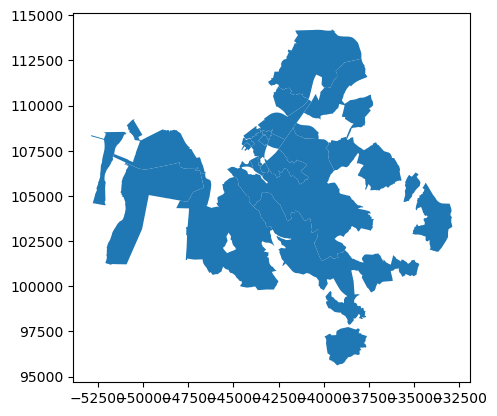

In [101]:
AE_AVRILH_MACRO_12UTs = gpd.read_file(r'.\data\input\geopackage_ETE2425.gpkg', layer='AE_AVRILH_MACRO_12UTs')
AE_AVRILH_MACRO_12UTs.plot()

In [102]:
print(gdf_HousingMarket_AvrIlh_modelling.shape)
gdf_HousingMarket_AvrIlh_modelling = gdf_HousingMarket_AvrIlh_modelling.overlay(AE_AVRILH_MACRO_12UTs, how='intersection')
gdf_HousingMarket_AvrIlh_modelling.drop(columns='spss_clust', inplace=True)
gdf_HousingMarket_AvrIlh_modelling.shape


(648, 19)


(648, 20)

In [103]:
gdf_HousingMarket_AvrIlh_modelling.columns

Index(['ID', 'LnPrice', 'LnPriceM2', 'LnA', 'LnTypology', 'LnIdade',
       'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 'D_apartment', 'D_C21',
       'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020', 'D_2021', 'D_2022',
       'D_2023', 'MACROZONAS12', 'geometry'],
      dtype='object')

In [104]:
gdf_HousingMarket_AvrIlh_modelling['MACROZONAS12'].unique()

array(['MixedF08', 'MixedF04', 'MixedF05', 'MixedF12', 'MixedF10',
       'MixedF06', 'MixedF07', 'MixedF09', 'MixedF03', 'MixedF11',
       'MixedF01', 'MixedF02'], dtype=object)

In [105]:
gdf_HousingMarket_AvrIlh_modelling.groupby('MACROZONAS12')['ID'].count()

MACROZONAS12
MixedF01     32
MixedF02     60
MixedF03     90
MixedF04    107
MixedF05     36
MixedF06     72
MixedF07     16
MixedF08     27
MixedF09     42
MixedF10     36
MixedF11     38
MixedF12     92
Name: ID, dtype: int64

In [106]:
gdf_HousingMarket_AvrIlh_modelling = pd.concat([gdf_HousingMarket_AvrIlh_modelling, pd.get_dummies(gdf_HousingMarket_AvrIlh_modelling['MACROZONAS12'], prefix = "D")], axis = 1 )

# Para evitar multicolinariedade eliminamos a variável D_MixedF08 
# NOTA: ao eliminar uma das variáveis dummies, estamos a assumir que a variável eliminada é a base da comparação
# ou seja, o coeficiente da variável eliminada é zero, e os coeficientes das restantes variáveis dummies são "variações" relativas à variável eliminada

gdf_HousingMarket_AvrIlh_modelling.drop(columns=['D_MixedF04'], inplace=True)

#### Matrizes de pesos / vizinhança

In [107]:
from pysal.lib import weights


# # https://pysal.org/libpysal/api.html
# from libpysal.weights.contiguity import Queen

# from libpysal.cg import voronoi_frames

In [108]:
gdf_HousingMarket_AvrIlh_modelling.columns

Index(['ID', 'LnPrice', 'LnPriceM2', 'LnA', 'LnTypology', 'LnIdade',
       'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 'D_apartment', 'D_C21',
       'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020', 'D_2021', 'D_2022',
       'D_2023', 'MACROZONAS12', 'geometry', 'D_MixedF01', 'D_MixedF02',
       'D_MixedF03', 'D_MixedF05', 'D_MixedF06', 'D_MixedF07', 'D_MixedF08',
       'D_MixedF09', 'D_MixedF10', 'D_MixedF11', 'D_MixedF12'],
      dtype='object')

Escolha de um caso para análise detalhada

#### KNN (k vizinhos mais próximos)

In [109]:
# combine x and y
vector_pnts = np.column_stack([gdf_HousingMarket_AvrIlh_modelling.geometry.x, gdf_HousingMarket_AvrIlh_modelling.geometry.y])

In [110]:
wk4 = libpysal.cg.brute_knn(vector_pnts, 4, mode='xyz', radius=60000)

In [111]:
wk4 = libpysal.weights.W(wk4)

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\1399410850.py:1: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  wk4 = libpysal.weights.W(wk4)


In [112]:
wk4.n

648

In [113]:
wk4

In [114]:
gdf_HousingMarket_AvrIlh_modelling.shape

(648, 31)

In [115]:
# Row standardization of W
wk4.transform = 'r'

In [116]:
type(wk4)

libpysal.weights.weights.W

»» Número de casos: 
 648
»» Número de casos sem vizinhos: 
 []
»» Indicador de densidade da matriz: 
 0.6172839506172839
»» Vizinhos (referência) da habitação [225]: 
 [98, 115, 83, 341]
»» Pesos atríbuidos aos Vizinhos da habitação [225]: 
 {98: 0.25, 115: 0.25, 83: 0.25, 341: 0.25}
Axes(0.125,0.11;0.775x0.77)


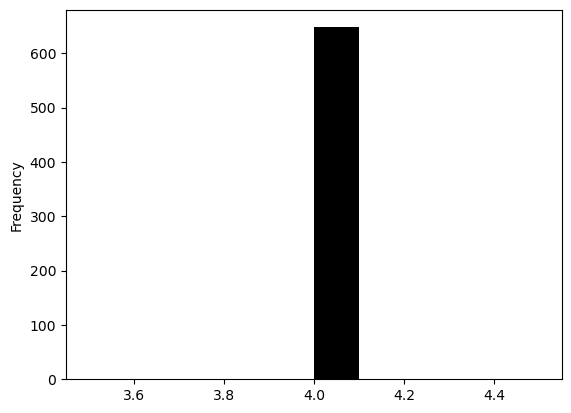

In [117]:
print("»» Número de casos: \n" , wk4.n)
print("»» Número de casos sem vizinhos: \n" ,wk4.islands)
print("»» Indicador de densidade da matriz: \n" , wk4.pct_nonzero)
print("»» Vizinhos (referência) da habitação [225]: \n" , wk4.neighbors[125])
print("»» Pesos atríbuidos aos Vizinhos da habitação [225]: \n", wk4[125])
print(pd.Series(wk4.cardinalities).plot.hist(color='k') )

Text(0.5, 1.0, 'Grafo geográfico da matriz de pesos espaciais - KNN (k=4)')

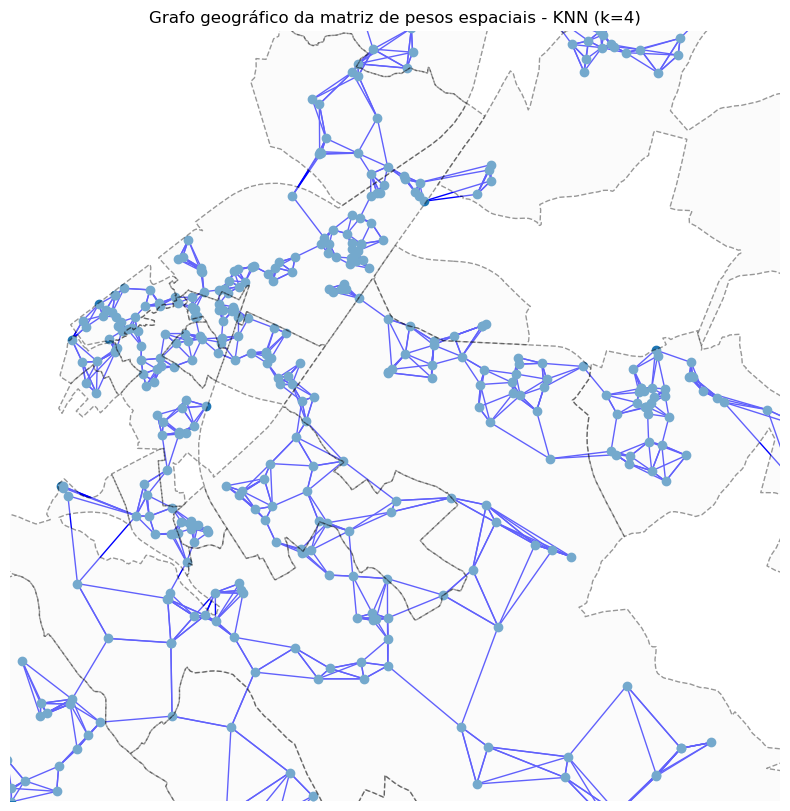

In [118]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.use_sticky_edges = False
#ax.margins(x=-0.45, y=-0.45)
#ax.set_aspect('equal')

wk4.plot(gdf_HousingMarket_AvrIlh_modelling, ax=ax,
        edge_kws=dict(color='blue', linestyle='-', linewidth=1),
        node_kws=dict(marker='', color='black')
        )

gdf_HousingMarket_AvrIlh.plot(ax=ax,
                              zorder=2) 


AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=3, 
                           color='whitesmoke', 
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           alpha = 0.4 )

ax.set_xbound(-45000, -38000 )
ax.set_ybound(111000, 104000)
ax.set_axis_off()
ax.set_title('Grafo geográfico da matriz de pesos espaciais - KNN (k=4)')


##### W Knn Análise exploratória 

In [119]:
# from pysal.explore import esda
from esda.moran import Moran
from esda.moran import Moran_Local

# https://splot.readthedocs.io/en/latest/api.html
# pysal.viz »» splot [splot.esda] (tem métodos para esda e outras componentes - ver api)
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from splot.esda import plot_moran


In [120]:
moran_LnPrice_wk4 = Moran(gdf_HousingMarket_AvrIlh_modelling['LnPrice'], wk4)
moran_LnPrice_wk4.I, moran_LnPrice_wk4.p_sim

(np.float64(0.21324925724766197), np.float64(0.001))

In [121]:
# Compute spatial lag of `LnPrice_lag`
gdf_HousingMarket_AvrIlh_modelling["LnPrice_lag_wk4"]  = weights.lag_spatial(wk4, gdf_HousingMarket_AvrIlh_modelling['LnPrice'])


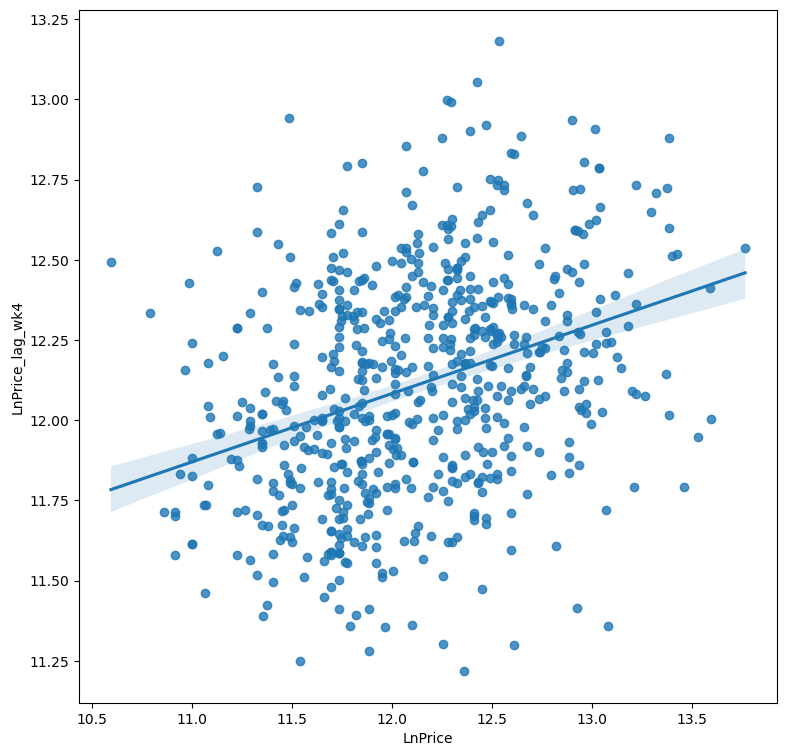

In [122]:
# Setup the figure and axis
figura, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="LnPrice", y="LnPrice_lag_wk4", data=gdf_HousingMarket_AvrIlh_modelling)
# Display
plt.show()




In [123]:
# calculate Moran_Local and plot
moranLocal_LnPrice_wk4 = Moran_Local(gdf_HousingMarket_AvrIlh_modelling['LnPrice'], wk4)

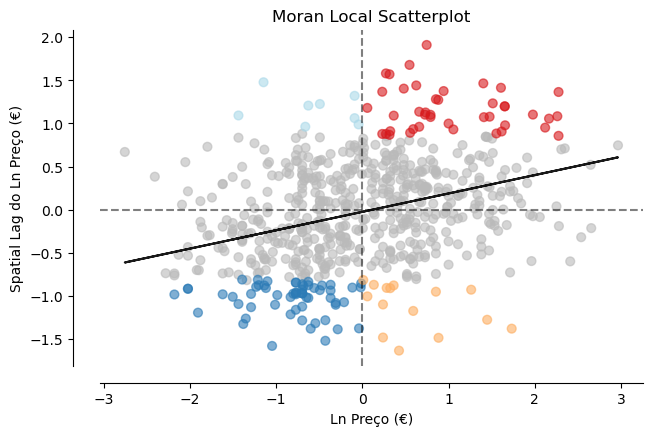

In [124]:
figura, ax = moran_scatterplot(moranLocal_LnPrice_wk4, p=0.05)
ax.set_xlabel('Ln Preço (€)')
ax.set_ylabel('Spatial Lag do Ln Preço (€)')
plt.show()

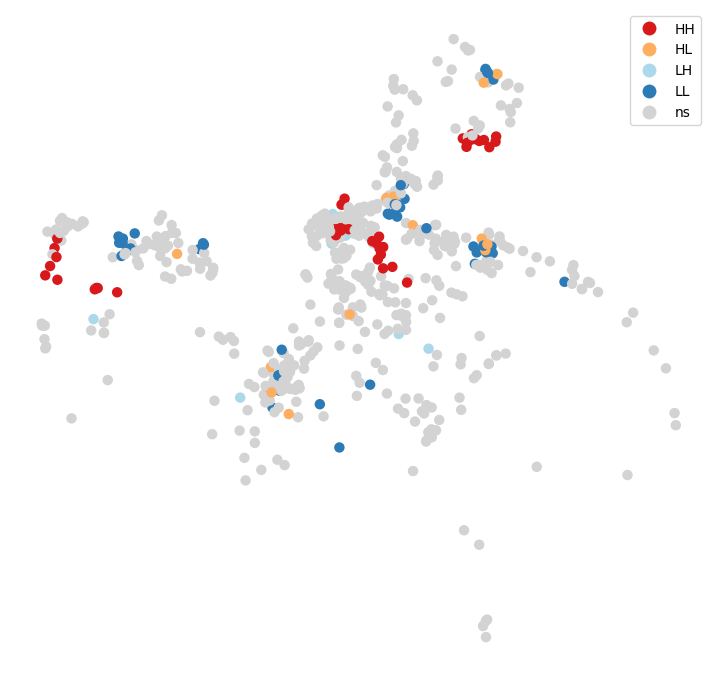

In [125]:
lisa_cluster(moranLocal_LnPrice_wk4, gdf_HousingMarket_AvrIlh_modelling, p=0.05, figsize = (9,9))
plt.show()

Text(0.5, 1.0, 'Grafo geográfico da matriz de pesos espaciais - KNN (k=4)')

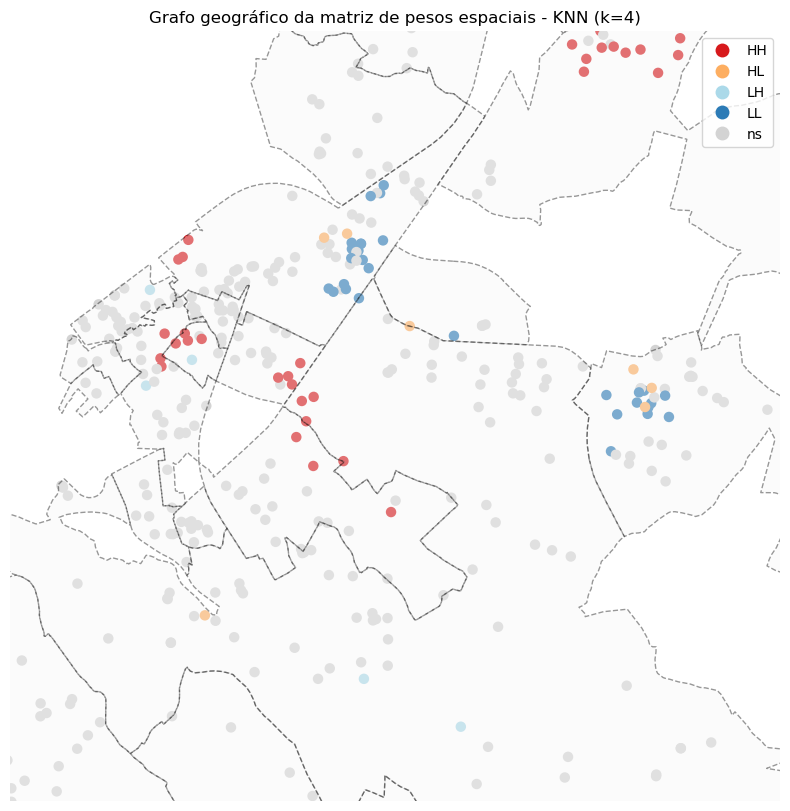

In [126]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.use_sticky_edges = False
#ax.margins(x=-0.45, y=-0.45)
#ax.set_aspect('equal')



lisa_cluster(moranLocal_LnPrice_wk4, gdf_HousingMarket_AvrIlh_modelling, p=0.05, ax=ax)

AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=3, 
                           color='whitesmoke', 
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           alpha = 0.4 )


ax.set_xbound(-45000, -38000 )
ax.set_ybound(111000, 104000)
ax.set_axis_off()
ax.set_title('Grafo geográfico da matriz de pesos espaciais - KNN (k=4)')

In [127]:
from scipy import stats

gdf_HousingMarket_AvrIlh_modelling['LnPrice_zscore']  = stats.zscore(gdf_HousingMarket_AvrIlh_modelling['LnPrice'] )
gdf_HousingMarket_AvrIlh_modelling['LnPrice_lag_wk4_zscore']  = stats.zscore(gdf_HousingMarket_AvrIlh_modelling['LnPrice_lag_wk4'] )

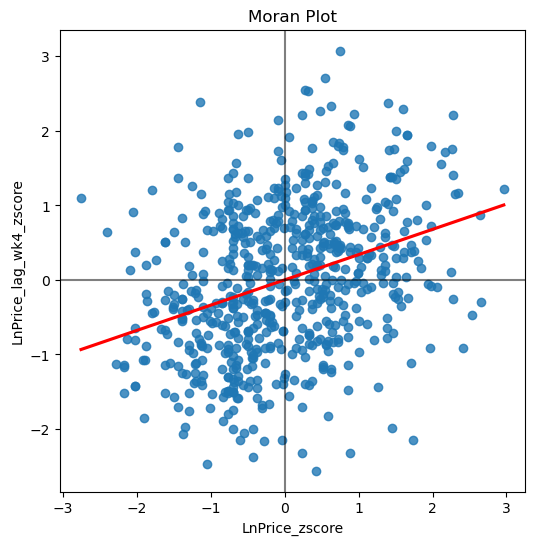

In [128]:
f, ax = plt.subplots(1, figsize=(6, 6))
sns.regplot(x='LnPrice_zscore', y='LnPrice_lag_wk4_zscore', 
                ci=None, data=gdf_HousingMarket_AvrIlh_modelling, line_kws={'color':'r'})
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
ax.set_title('Moran Plot')
plt.show()

#### Transformar pontos em polígonos
(Polígonos de voronoi)

IMPORTANTE: Neste caso, temos várias habitações (representadas por pontos) que têm exatamente a mesma coordenada geográfica (possível explicação? Habitações no mesmo edifício, como é o caso de um edifício de apartamentos!). Assim, para construir polígonos de voronoi, é necessário adotar uma estratégia indireta. Neste notebook, adota-se a estratégia de i) eliminar os pontos coincidentes ii) calculara os polígonos de voronoi para os pontos distintos iii) atribuir os polígonos de voronoi aos registos originais (ou seja, haverá registos com polígonos coincidentes!). Note-se que esta estratégia é uma simplificação e que poderá não ser a mais adequada para todos os casos. A determinação da matriz de pesos irá considerar os polígonos coincidentes como vizinhos uma vez que a operação decorre por comparação geométrica dos pontos coincidentes de fronteira dos polígonos.

In [129]:
from libpysal.cg import voronoi_frames

In [130]:
# combine x and y
vector_pnts_uniques = np.column_stack([gdf_HousingMarket_AvrIlh_modelling.geometry.x, gdf_HousingMarket_AvrIlh_modelling.geometry.y])

In [131]:
vector_pnts_uniques

array([[-44026.91216071, 108117.74600696],
       [-43807.99967213, 108010.09996583],
       [-34867.07651303, 105738.23397163],
       ...,
       [-50087.08827156, 106339.4911597 ],
       [-45782.50763405, 103977.1376461 ],
       [-46297.87960207, 100790.17970605]])

In [132]:
voronoi_polygons_gdf, voronoi_vertices_gdf = voronoi_frames(vector_pnts_uniques)

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\418560122.py:1: FutureWarning: The 'as_gdf' parameter currently defaults to True but will default to False in a future release. Set it explicitly to avoid this warning.
  voronoi_polygons_gdf, voronoi_vertices_gdf = voronoi_frames(vector_pnts_uniques)
C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\418560122.py:1: FutureWarning: The 'return_input' parameter currently defaults to True but will default to False in a future release. Set it explicitly to avoid this warning.
  voronoi_polygons_gdf, voronoi_vertices_gdf = voronoi_frames(vector_pnts_uniques)


Text(0.5, 1.0, 'Diagrama de Voronoi para os pontos de localização das habitações')

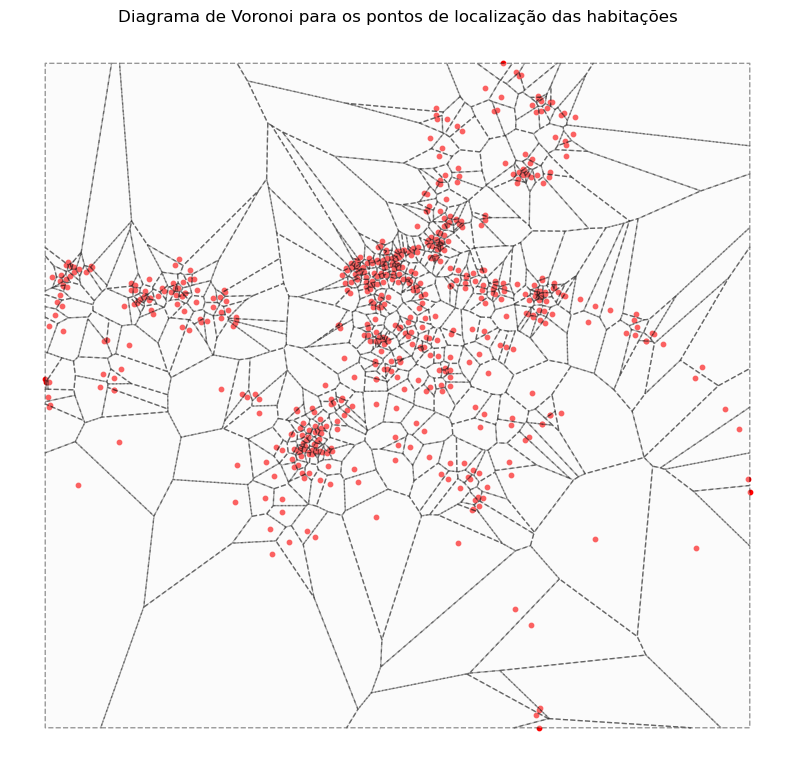

In [133]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.use_sticky_edges = False
#ax.margins(x=-0.45, y=-0.45)
#ax.set_aspect('equal')

gdf_HousingMarket_AvrIlh_modelling.plot(ax=ax, zorder=2, color='red', markersize=10)

voronoi_polygons_gdf.plot(ax=ax, 
                           zorder=3, 
                           color='whitesmoke', 
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           alpha = 0.4 )


# ax.set_xbound(-45000, -38000 )
# ax.set_ybound(111000, 104000)
ax.set_axis_off()
ax.set_title('Diagrama de Voronoi para os pontos de localização das habitações')

In [134]:
w_rook = weights.contiguity.Rook.from_dataframe(voronoi_polygons_gdf)

C:\Users\paulo\AppData\Local\Temp\ipykernel_24960\1914507877.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_rook = weights.contiguity.Rook.from_dataframe(voronoi_polygons_gdf)


»» Número de casos: 
 648
»» Número de casos sem vizinhos: 
 []
»» Indicador de densidade da matriz: 
 0.907350251486054
»» Vizinhos (referência) da habitação [225]: 
 [98, 330, 241, 115, 83, 149, 118, 88, 121]
»» Pesos atríbuidos aos Vizinhos da habitação [225]: 
 {98: 1.0, 330: 1.0, 241: 1.0, 115: 1.0, 83: 1.0, 149: 1.0, 118: 1.0, 88: 1.0, 121: 1.0}
Axes(0.125,0.11;0.775x0.77)


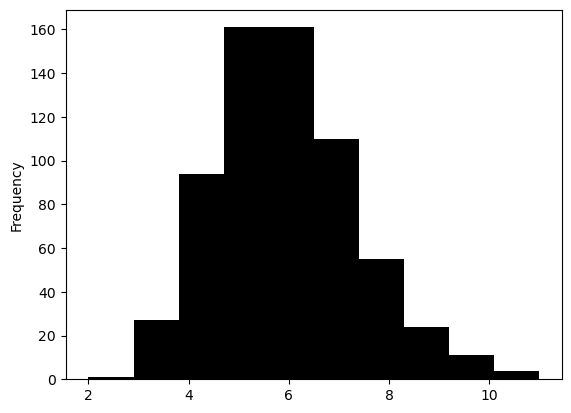

In [135]:
print("»» Número de casos: \n" , w_rook.n)
print("»» Número de casos sem vizinhos: \n" ,w_rook.islands)
print("»» Indicador de densidade da matriz: \n" , w_rook.pct_nonzero)
print("»» Vizinhos (referência) da habitação [225]: \n" , w_rook.neighbors[125])
print("»» Pesos atríbuidos aos Vizinhos da habitação [225]: \n", w_rook[125])
print(pd.Series(w_rook.cardinalities).plot.hist(color='k') )

In [136]:
w_rook.transform = 'r'

In [137]:
moran_LnPrice_wrook = Moran(gdf_HousingMarket_AvrIlh_modelling['LnPrice'], w_rook)
moran_LnPrice_wrook.I, moran_LnPrice_wrook.p_sim

(np.float64(0.19580016852266918), np.float64(0.001))

In [138]:
# Compute spatial lag of `LnPrice_lag`
gdf_HousingMarket_AvrIlh_modelling["LnPrice_lag_wrook"]  = weights.lag_spatial(w_rook, gdf_HousingMarket_AvrIlh_modelling['LnPrice'])


In [139]:
# calculate Moran_Local and plot
moranLocal_LnPrice_wrook = Moran_Local(gdf_HousingMarket_AvrIlh_modelling['LnPrice'], w_rook)

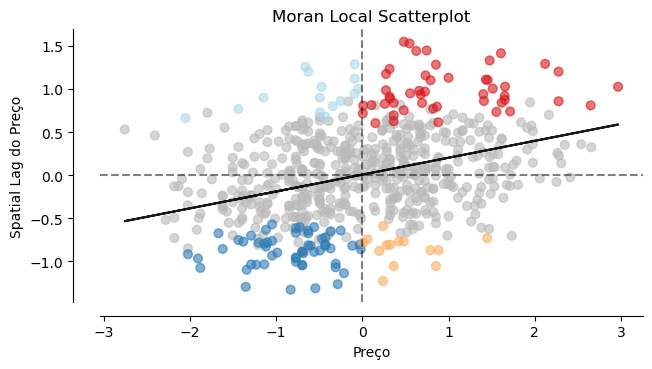

In [140]:
figura, ax = moran_scatterplot(moranLocal_LnPrice_wrook, p=0.05)
ax.set_xlabel('Preço')
ax.set_ylabel('Spatial Lag do Preço')
plt.show()

Text(0.5, 1.0, 'Grafo geográfico da matriz de pesos espaciais - WRook a partir de Poligonos de Voronoi')

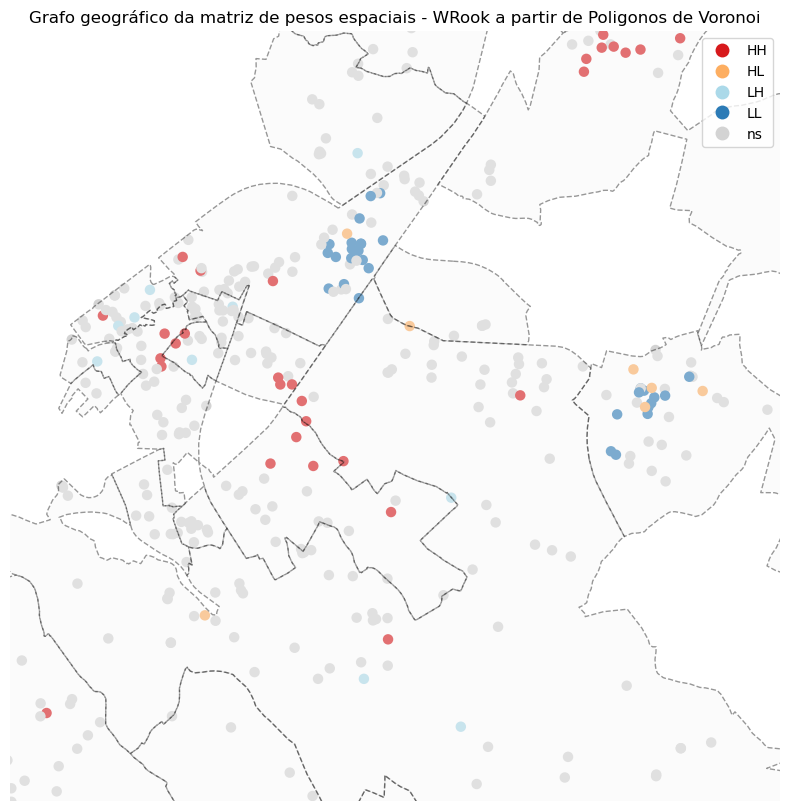

In [141]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.use_sticky_edges = False
#ax.margins(x=-0.45, y=-0.45)
#ax.set_aspect('equal')



lisa_cluster(moranLocal_LnPrice_wrook, gdf_HousingMarket_AvrIlh_modelling, p=0.05, ax=ax)

AE_AVRILH_MACRO_12UTs.plot(ax=ax, 
                           zorder=3, 
                           color='whitesmoke', 
                           edgecolor='black', 
                           linewidth=1, 
                           linestyle='--',
                           alpha = 0.4 )


ax.set_xbound(-45000, -38000 )
ax.set_ybound(111000, 104000)
ax.set_axis_off()
ax.set_title('Grafo geográfico da matriz de pesos espaciais - WRook a partir de Poligonos de Voronoi')

## Modelos econométricos espaciais - Modelar dependências espaciais

Como vimos anteriormente, a complexidade da noção de espaço exige a adoção de um conjunto de assunções sobre as características espaciais relevantes para o fenómeno em estudo bem como os efeitos que essa estrutura espacial suporta na relação entre as nossas observações.
Uma das formas de analisar estes efeitos passa por colocarmos o foco num conjunto de efeitos espaciais relacionados com a *configuração espacial* do nosso objeto de estudo / unidade de análise.

No exemplo que temos vindo a trabalhar, estes efeitos são facilmente identificados como parte de fenómenos amplamente reconhecidos: por exemplo, podemos facilmente colocar como hipótese que o preço de uma habitação não
para só depende das suas características físicas (como a sua área, se é uma moradia ou um apartamento, nova ou usada, etc), mas também poderá depender das características físicas das habitações que se encontram nas suas proximidades; uma moradia no meio de apartamentos em arranha-céus nas redondezas ou uma moradia no meio de um conjunto de moradias semelhantes será expectável que estas duas habitações (mantendo tudo o resto constante) tenham um associação com as habitações que as rodeiam.
Que forma poderá tomar essa associação? Pode, na verdade, estar associado a fenómenos espaciais ligeiramente diferenciados, por exemplo um efeito associado à localização da habitação e das suas vizinhas, formando conjunto com a) características físicas observadas (as variáveis explicativas do preço da habitação), b) um efeito associado à partilha de um determinado "ambiente urbano" e das habitações aí localizadas. 

Nos efeitos de **dependência espacial** os efeitos relacionam-se fundamentalmente com as características das nossas observações (objeto de estudo) e ao seu arranjo espacial particular.

Quatro modelos principais:
1. **Modelo de Desfasagem Espacial (SLM)**  
2. **Modelo de Erro Espacial (SEM)**  
3. **Modelo de Durbin Espacial (SDM)**  
4. **Modelo de Desfasagem e Erro Espacial (SLEM)**  

**Modelo de Defasagem Espacial (SLM)**

O Modelo de Defasagem Espacial introduz dependência espacial diretamente na variável dependente. O modelo é expresso como:

$$ Y = \rho WY + X\beta + \varepsilon $$

Onde:  
- $Y$: vetor das variáveis dependentes.  
- $W$: matriz de pesos espaciais, indicando a estrutura de dependência espacial.  
- $\rho$: coeficiente autorregressivo espacial.  
- $X$: matriz das variáveis explicativas.  
- $\beta$: vetor dos coeficientes.  
- $\varepsilon$: termo de erro.

**Mecanismo:** O termo $WY$ significa que a variável dependente em um local depende das variáveis dependentes das regiões vizinhas.

**Derivação dos Efeitos Diretos, Indiretos e Totais**

$$
Y = (I - \rho W)^{-1} X \beta + (I - \rho W)^{-1} \varepsilon
$$

Derivada parcial de $Y$ em relação a $X$:

$$
\frac{\partial Y}{\partial X} = (I - \rho W)^{-1} \beta
$$

- **Efeito Direto:** Diagonal de $(I - \rho W)^{-1} \beta$.  
- **Efeito Indireto:** Soma das componentes fora da diagonal.  
- **Efeito Total:** Soma de todos os efeitos diretos e indiretos.

---

**Modelo de Erro Espacial (SEM)**

$$
Y = X \beta + \varepsilon \quad \text{com} \quad \varepsilon = \lambda W \varepsilon + \mu
$$

- $\lambda$: coeficiente autorregressivo nos erros.  
- $\mu$: erro aleatório normal.

**Mecanismo:** A dependência espacial é modelada nos erros.

Derivada:  

$$
Y = X \beta + (I - \lambda W)^{-1} \mu
$$

---

**Modelo de Durbin Espacial (SDM)**

$$
Y = \rho W Y + X \beta + W X \theta + \varepsilon
$$

**Derivação dos Efeitos**

$$
E[Y] = (I - \rho W)^{-1} (X \beta + W X \theta)
$$

$$
\frac{\partial E[Y]}{\partial X} = (I - \rho W)^{-1} (\beta + W \theta)
$$

- **Efeito Direto:** Diagonal.  
- **Efeito Indireto:** Soma fora da diagonal.  
- **Efeito Total:** Soma dos dois.

---

**Modelo de Defasagem e Erro Espacial (SLEM)**

$$
Y = \rho W Y + X \beta + \varepsilon \quad \text{com} \quad \varepsilon = \lambda W \varepsilon + \mu
$$

**Derivação dos Efeitos**

$$
Y = (I - \rho W)^{-1} X \beta + (I - \rho W)^{-1} (I - \lambda W)^{-1} \mu
$$

- **Efeito Direto:** Diagonal de $(I - \rho W)^{-1} \beta$.  
- **Efeito Indireto:** Fora da diagonal.



In [142]:
import libpysal
from spreg import OLS, ML_Lag
from spreg import likratiotest

### M0: Modelo Base (não espacial)

Antes de discutirmos como incluir explicitamente o espaço na estrutura de regressão linear, vamos construir um modelo de regressão básico.
A ideia central da regressão linear é explicar a variação em uma determinada variável (*a explicar* / *dependente*) como uma função linear de uma coleção de outras variáveis (*explicativas* / *independentes*). 
No exemplo aqui trabalhado queremos expressar / explicar o preço de uma casa em função de um conjunto de variáveis explicativas como seja a área, o tipo (aparamento ou moradia) a categoria de preservação e um conunto de outras características de qualidade e conforto assinaladas.
Podemos expressar o nosso modelo como:

$$
P_i = \alpha + \sum_k \mathbf{X}_{ik}\beta_k  + \epsilon_i
$$

onde $P_i$ é o preço por m2 da habitaçao anunuciado, $i$, and $X$ é o conjunto de variáveis que selecionamos como candidatas a variáveis explicativas do referido preço. $\beta$ é o conjunto de parâmetros que nos indicam como e com que extensão cada uma das variáveis explicativas selecionadas está relacionada (em média) com os preços da habitação (numa expecificação simples podem ser interpretados como o "preço" (preço hedónico) específico do referido atributo da habitação). $\alpha$, é um termo constante que nos indica o valor (médio) da variável dependente quando todas as outras variáveis são iguais a zero (o que, numa interpretação simples para um modelo com especificação simples no nosso caso de estudo poderá ser interpretado como o preço do terreno da habitação). O termo $\epsilon_i$ é usualmente referido como  "erro" e captura os elementos que influenciam a variável a explicar mas que não foram incluídas como variáveis explicativas $X$. 

Podemos ainda expressar este modelo na forma matricial, excluindo os índices $i$ correspondentes à observação individual: 

$$
P = \alpha + \mathbf{X}\beta + \epsilon
$$

In [143]:
gdf_HousingMarket_AvrIlh_modelling.columns

Index(['ID', 'LnPrice', 'LnPriceM2', 'LnA', 'LnTypology', 'LnIdade',
       'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 'D_apartment', 'D_C21',
       'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020', 'D_2021', 'D_2022',
       'D_2023', 'MACROZONAS12', 'geometry', 'D_MixedF01', 'D_MixedF02',
       'D_MixedF03', 'D_MixedF05', 'D_MixedF06', 'D_MixedF07', 'D_MixedF08',
       'D_MixedF09', 'D_MixedF10', 'D_MixedF11', 'D_MixedF12',
       'LnPrice_lag_wk4', 'LnPrice_zscore', 'LnPrice_lag_wk4_zscore',
       'LnPrice_lag_wrook'],
      dtype='object')

In [144]:
gdf_HousingMarket_AvrIlh_modelling.iloc[[0,-1]]

,ID,LnPrice,LnPriceM2,LnA,LnTypology,LnIdade,D_used_1025y,D_used_10y,D_used_plus25y,D_apartment,...,D_MixedF07,D_MixedF08,D_MixedF09,D_MixedF10,D_MixedF11,D_MixedF12,LnPrice_lag_wk4,LnPrice_zscore,LnPrice_lag_wk4_zscore,LnPrice_lag_wrook
0,106045,11.289782,6.422247,4.867534,1.386294,3.258097,False,False,True,True,...,False,True,False,False,False,False,12.332864,-1.504753,0.641408,12.234176
647,1897231,11.813030,7.130899,4.682131,1.098612,3.044522,True,False,False,True,...,False,False,False,False,False,False,12.406099,-0.559725,0.851436,12.037704


In [145]:
select_target_variable = ['LnPriceM2'] # LnPrice

select_base_Xvariables = [ 'LnA', 'LnTypology', 
                          'LnIdade', 'D_used_1025y', 'D_used_10y', 'D_used_plus25y',
                           'D_apartment', 
                           'D_C21', 'D_Imovirtual', 'D_Sapo', 
                           'D_2019', 'D_2020', 'D_2021', 'D_2022', 'D_2023',
                           'D_MixedF01', 'D_MixedF02', 'D_MixedF03', 'D_MixedF05', 'D_MixedF06', 'D_MixedF07', 'D_MixedF08', 'D_MixedF09', 'D_MixedF10', 'D_MixedF11', 'D_MixedF12']

In [146]:
gdf_HousingMarket_AvrIlh_modelling[select_target_variable].dtypes

LnPriceM2    float64
dtype: object

In [147]:
gdf_HousingMarket_AvrIlh_modelling[select_base_Xvariables].dtypes

LnA               float64
LnTypology        float64
LnIdade           float64
D_used_1025y         bool
D_used_10y           bool
D_used_plus25y       bool
D_apartment          bool
D_C21                bool
D_Imovirtual         bool
D_Sapo               bool
D_2019               bool
D_2020               bool
D_2021               bool
D_2022               bool
D_2023               bool
D_MixedF01           bool
D_MixedF02           bool
D_MixedF03           bool
D_MixedF05           bool
D_MixedF06           bool
D_MixedF07           bool
D_MixedF08           bool
D_MixedF09           bool
D_MixedF10           bool
D_MixedF11           bool
D_MixedF12           bool
dtype: object

#### M0a

In [148]:
M0a = OLS(
    gdf_HousingMarket_AvrIlh_modelling[select_target_variable].astype(float).values, 
    gdf_HousingMarket_AvrIlh_modelling[select_base_Xvariables].astype(float).values,
    name_y='LnPriceM2', 
    name_x=select_base_Xvariables)
    #w=wk4, 
    #spat_diag=True)

In [149]:
print(M0a.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   LnPriceM2                Number of Observations:         648
Mean dependent var  :      7.3293                Number of Variables   :          27
S.D. dependent var  :      0.5041                Degrees of Freedom    :         621
R-squared           :      0.6287
Adjusted R-squared  :      0.6132
Sum squared residual:     61.0419                F-statistic           :     40.4471
Sigma-square        :       0.098                Prob(F-statistic)     :  2.058e-115
S.E. of regression  :       0.314                Log likelihood        :    -154.077
Sigma-square ML     :       0.094                Akaike info criterion :     362.154
S.E of regression ML:      0.3069                Schwarz criterion     :     482.949

------------------------------------------------------------

#### M0a :: Diagnóstico estatístico "standard" do modelo 
https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

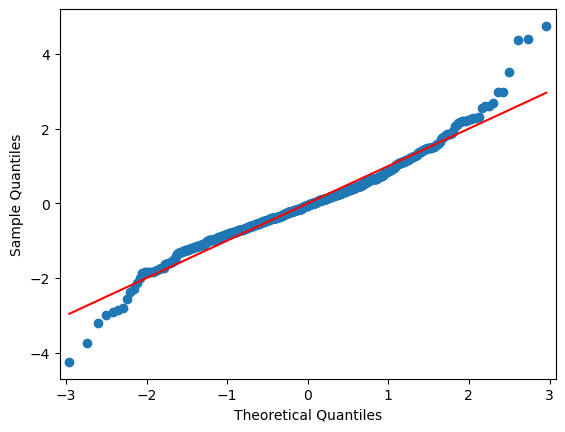

In [150]:
import statsmodels.api as sm
sm.qqplot(M0a.u[:,0], line='s', fit=True)
plt.show()

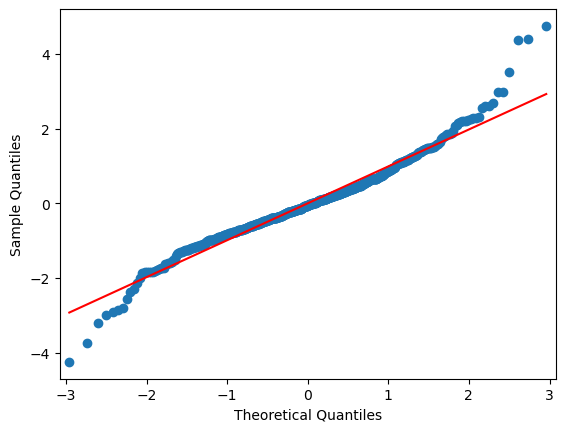

In [151]:
sm.qqplot(M0a.u[:,0], line='r', fit=True)
plt.show()

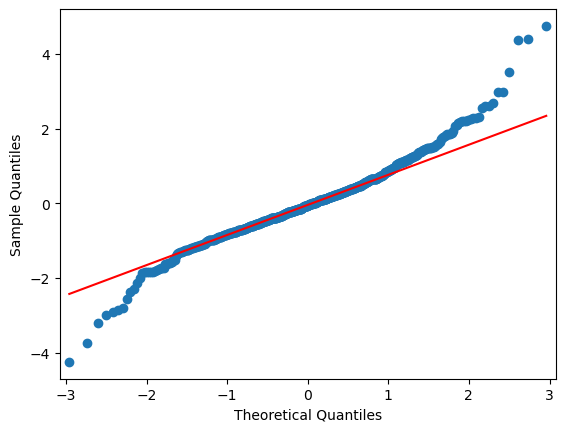

In [152]:
sm.qqplot(M0a.u[:,0], line='q', fit=True)
plt.show()

In [153]:
gdf_HousingMarket_AvrIlh_modelling.columns

Index(['ID', 'LnPrice', 'LnPriceM2', 'LnA', 'LnTypology', 'LnIdade',
       'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 'D_apartment', 'D_C21',
       'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020', 'D_2021', 'D_2022',
       'D_2023', 'MACROZONAS12', 'geometry', 'D_MixedF01', 'D_MixedF02',
       'D_MixedF03', 'D_MixedF05', 'D_MixedF06', 'D_MixedF07', 'D_MixedF08',
       'D_MixedF09', 'D_MixedF10', 'D_MixedF11', 'D_MixedF12',
       'LnPrice_lag_wk4', 'LnPrice_zscore', 'LnPrice_lag_wk4_zscore',
       'LnPrice_lag_wrook'],
      dtype='object')

In [154]:
X = gdf_HousingMarket_AvrIlh_modelling[select_base_Xvariables].astype(float).values
X = sm.add_constant(X)

Y = gdf_HousingMarket_AvrIlh_modelling[select_target_variable].astype(float).values

In [155]:
select_base_Xvariables

['LnA',
 'LnTypology',
 'LnIdade',
 'D_used_1025y',
 'D_used_10y',
 'D_used_plus25y',
 'D_apartment',
 'D_C21',
 'D_Imovirtual',
 'D_Sapo',
 'D_2019',
 'D_2020',
 'D_2021',
 'D_2022',
 'D_2023',
 'D_MixedF01',
 'D_MixedF02',
 'D_MixedF03',
 'D_MixedF05',
 'D_MixedF06',
 'D_MixedF07',
 'D_MixedF08',
 'D_MixedF09',
 'D_MixedF10',
 'D_MixedF11',
 'D_MixedF12']

In [156]:
OLS_sm_mod = sm.OLS(Y, X)

In [157]:
OLS_sm_mod_fit_results = OLS_sm_mod.fit()
print(OLS_sm_mod_fit_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     40.45
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          2.06e-115
Time:                        09:12:16   Log-Likelihood:                -154.08
No. Observations:                 648   AIC:                             362.2
Df Residuals:                     621   BIC:                             482.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0975      0.224     40.639      0.0

In [158]:
from utils.utils_ete2425 import LinearRegDiagnostic


In [159]:
cls = LinearRegDiagnostic(OLS_sm_mod_fit_results)

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

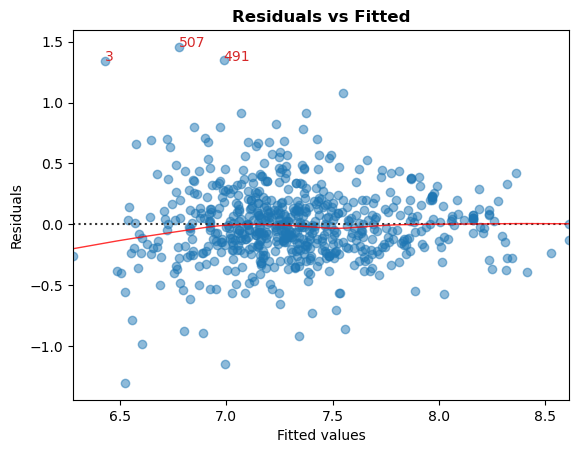

In [160]:
cls.residual_plot()

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

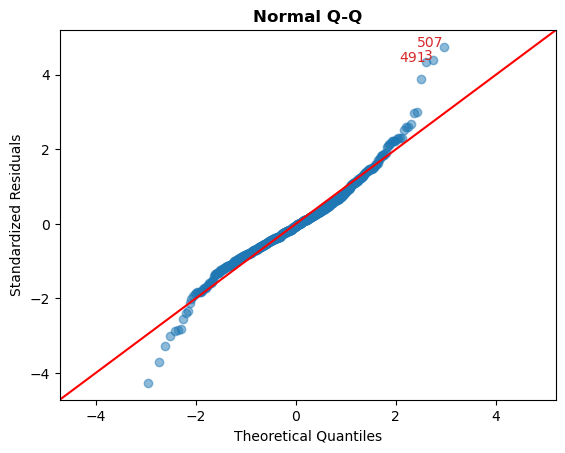

In [161]:
cls.qq_plot()

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

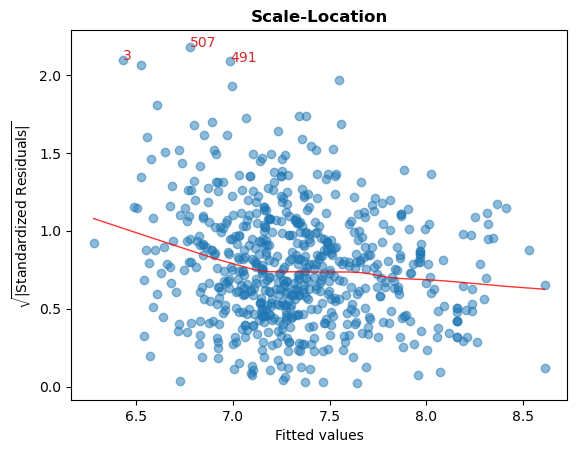

In [162]:
cls.scale_location_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

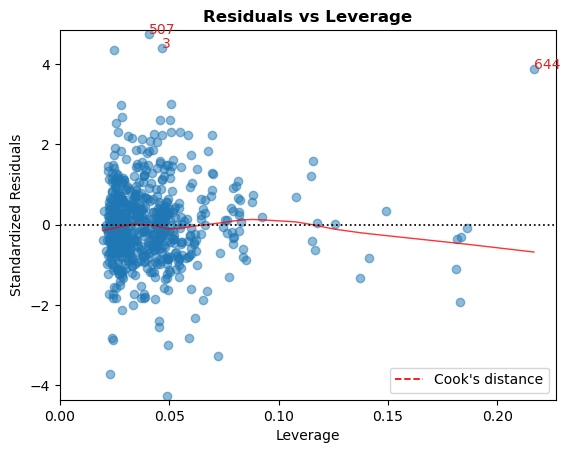

In [163]:
cls.leverage_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

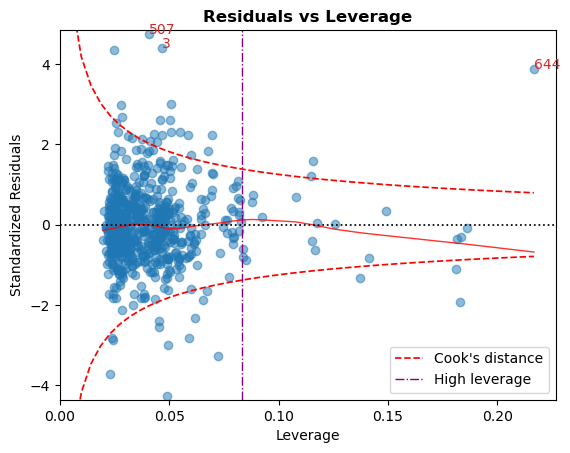

In [164]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof')

In [165]:
cls.vif_table()

,Features,VIF Factor
15,x15,1.12
21,x21,1.19
19,x19,1.31
22,x22,1.31
16,x16,1.32
24,x24,1.33
23,x23,1.39
25,x25,1.40
17,x17,1.47
11,x11,1.51


#### M0a :: Análise exploratória adicional (espacial)

In [166]:
AE_AVRILH_MESO_4UTs

,MACROZONA4,geometry
0,Beaches,"MULTIPOLYGON (((-50978.339 108508.407, -50996...."
1,Center,"MULTIPOLYGON (((-42223.687 109246.641, -42014...."
2,Rural,"MULTIPOLYGON (((-38652.264 97746.458, -39084.2..."
3,Rural,"MULTIPOLYGON (((-43182.317 103343.97, -43196.1..."
4,Rural,"MULTIPOLYGON (((-33871.453 104957.538, -33954...."
5,Rural,"MULTIPOLYGON (((-39768.752 105692.285, -39771...."
6,Rural,"MULTIPOLYGON (((-34758.125 106189.443, -34764...."
7,Rural,"MULTIPOLYGON (((-50981.66 106857.988, -51024.6..."
8,Rural,"MULTIPOLYGON (((-37087.017 107948.943, -37092...."
9,Rural,"MULTIPOLYGON (((-37266.746 110018.7, -37269.37..."


In [167]:
print(gdf_HousingMarket_AvrIlh_modelling.shape)
gdf_HousingMarket_AvrIlh_modelling = gdf_HousingMarket_AvrIlh_modelling.overlay(AE_AVRILH_MESO_4UTs, how='intersection')
gdf_HousingMarket_AvrIlh_modelling.shape


(648, 35)


(648, 36)

In [168]:
gdf_HousingMarket_AvrIlh_modelling["M0a_u"] = M0a.u
gdf_HousingMarket_AvrIlh_modelling.head(3)

,ID,LnPrice,LnPriceM2,LnA,LnTypology,LnIdade,D_used_1025y,D_used_10y,D_used_plus25y,D_apartment,...,D_MixedF10,D_MixedF11,D_MixedF12,LnPrice_lag_wk4,LnPrice_zscore,LnPrice_lag_wk4_zscore,LnPrice_lag_wrook,MACROZONA4,geometry,M0a_u
0,106045,11.289782,6.422247,4.867534,1.386294,3.258097,False,False,True,True,...,False,False,False,12.332864,-1.504753,0.641408,12.234176,Center,POINT (-44026.912 108117.746),-0.918572
1,106260,11.736069,7.044721,4.691348,1.386294,3.555348,False,False,True,True,...,False,False,False,12.610253,-0.698723,1.436924,12.159339,Center,POINT (-43808 108010.1),-0.301277
2,1963595,12.464583,6.943122,5.521461,1.791759,4.290459,False,False,True,False,...,False,False,False,12.038724,0.617033,-0.202148,12.038724,Rural,POINT (-34867.077 105738.234),0.114182


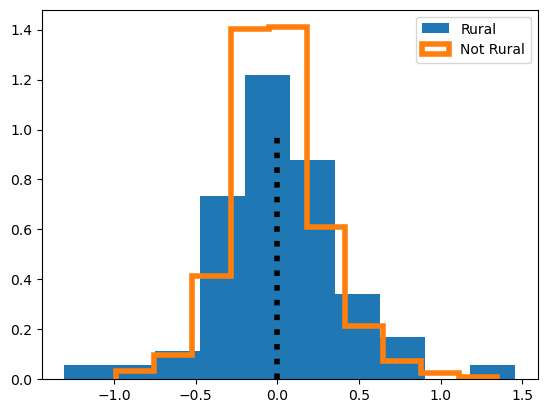

In [169]:
is_Rural = np.where(gdf_HousingMarket_AvrIlh_modelling['MACROZONA4'] == 'Rural', True, False)
rural = gdf_HousingMarket_AvrIlh_modelling.M0a_u[is_Rural]
not_rural = gdf_HousingMarket_AvrIlh_modelling.M0a_u[~is_Rural]
plt.hist(rural, density=True, label='Rural')
plt.hist(
    not_rural, 
    histtype='step',
    density=True, 
    linewidth=4, 
    label='Not Rural'
)
plt.vlines(0,0,1, linestyle=":", color='k', linewidth=4)
plt.legend()
plt.show()

classic t-test

H0: Dist1 = Dist2 vs H1: Dist1 =/= Dist2 

Decision:
pvalue < 0,05 -> Reject H0

In [170]:
stats.ttest_ind(rural, not_rural)

TtestResult(statistic=np.float64(0.5661836314190837), pvalue=np.float64(0.5714655832375238), df=np.float64(646.0))

In [171]:
medians = gdf_HousingMarket_AvrIlh_modelling.groupby(
    "MACROZONA4"
).M0a_u.median().to_frame(
    'Residual'
)

In [172]:
medians

,Residual
MACROZONA4,
Beaches,-0.003292
Center,0.029867
Rural,-0.002924
Suburban,-0.046586


In [173]:
gdf_HousingMarket_AvrIlh_modelling.merge(
        medians, 
        how='left',
        left_on='MACROZONA4',
        right_on='MACROZONA4'
    )

,ID,LnPrice,LnPriceM2,LnA,LnTypology,LnIdade,D_used_1025y,D_used_10y,D_used_plus25y,D_apartment,...,D_MixedF11,D_MixedF12,LnPrice_lag_wk4,LnPrice_zscore,LnPrice_lag_wk4_zscore,LnPrice_lag_wrook,MACROZONA4,geometry,M0a_u,Residual
0,106045,11.289782,6.422247,4.867534,1.386294,3.258097,False,False,True,True,...,False,False,12.332864,-1.504753,0.641408,12.234176,Center,POINT (-44026.912 108117.746),-0.918572,0.029867
1,106260,11.736069,7.044721,4.691348,1.386294,3.555348,False,False,True,True,...,False,False,12.610253,-0.698723,1.436924,12.159339,Center,POINT (-43808 108010.1),-0.301277,0.029867
2,1963595,12.464583,6.943122,5.521461,1.791759,4.290459,False,False,True,False,...,False,False,12.038724,0.617033,-0.202148,12.038724,Rural,POINT (-34867.077 105738.234),0.114182,-0.002924
3,100272,12.971540,7.778584,5.192957,1.386294,4.290459,False,False,True,False,...,False,False,12.020986,1.532639,-0.253020,12.174276,Rural,POINT (-41784.118 111557.222),1.346158,-0.002924
4,100274,12.491252,7.011863,5.479388,1.386294,2.302585,False,True,False,False,...,False,True,12.284157,0.665198,0.501723,12.396955,Rural,POINT (-39562.833 103805.735),0.133742,-0.002924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2004573,11.881035,7.337740,4.543295,1.098612,3.044522,True,False,False,True,...,False,False,11.708012,-0.436903,-1.150591,11.662431,Suburban,POINT (-49867.887 107457.952),-0.547794,-0.046586
644,2004581,12.873902,8.625407,4.248495,0.000000,4.025352,False,False,True,False,...,False,False,12.179022,1.356296,0.200207,12.491850,Suburban,POINT (-44291.92 104597.028),1.075094,-0.046586
645,2004781,12.644328,8.166991,4.477337,1.386294,2.833213,True,False,False,False,...,False,False,12.884908,0.941666,2.224602,12.399801,Rural,POINT (-50087.088 106339.491),-0.024234,-0.002924
646,2005854,11.831379,7.704245,4.127134,1.098612,3.526361,False,False,True,False,...,False,False,11.809040,-0.526585,-0.860854,11.866588,Suburban,POINT (-45782.508 103977.138),-0.310466,-0.046586


#### M0b

In [174]:
M0b = OLS(
    gdf_HousingMarket_AvrIlh_modelling[select_target_variable].astype(float).values, 
    gdf_HousingMarket_AvrIlh_modelling[select_base_Xvariables].astype(float).values,
    name_y='LnPrice', 
    name_x=select_base_Xvariables,
    w = wk4,
    spat_diag=True)

In [175]:
print(M0b.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     LnPrice                Number of Observations:         648
Mean dependent var  :      7.3293                Number of Variables   :          27
S.D. dependent var  :      0.5041                Degrees of Freedom    :         621
R-squared           :      0.6287
Adjusted R-squared  :      0.6132
Sum squared residual:     61.0419                F-statistic           :     40.4471
Sigma-square        :       0.098                Prob(F-statistic)     :  2.058e-115
S.E. of regression  :       0.314                Log likelihood        :    -154.077
Sigma-square ML     :       0.094                Akaike info criterion :     362.154
S.E of regression ML:      0.3069                Schwarz criterion     :     482.949

------------------------------------------------------------

Mas como **escolher a especificação / modelo** para incorporar relações de dependência espacial no nosso modelo? 
Os dois mecanismos principais são:
- Dependência **no valor da variável dependente** $\rightarrow$ modelo com lag espacial (SAR).
- Dependência **nos erros** $\rightarrow$ modelo com erro espacial (SEM).

Para nos ajudar no processo de decisão, além da teoria, podemos socorrer-nos de dois testes estatísticos fundamentais:
- **Testes de Multiplicadores de Lagrange (LM)**.
- **Testes de Razão de Verosimilhanças (LR)**.

---

**O Desafio da Especificação de Modelos em Econometria Espacial**

Ao escolher um modelo econométrico espacial, é importante determinar se existe dependência espacial nos dados. Modelos incorretamente especificados resultam em estimadores ineficientes, viesados ou inconsistentes.

Exemplos:
1. **Modelo com Lag Espacial na variável Y**:

$$
y = \rho W y + X\beta + \varepsilon
$$

2. **Modelo de erro (SEM)**:

$$
y = X\beta + u, \quad u = \lambda W u + \varepsilon
$$

---

**Testes de Multiplicadores de Lagrange (LM)**

Os **testes LM** servem como diagnóstico inicial para indicar se há dependência espacial. Baseiam-se no **gradiente** da função de log-verosimilhança sob a hipótese nula.

**Ideia Geral:**
- Estima-se o modelo **OLS clássico**, sem efeitos espaciais.
- Com base nos resíduos $e$, calcula-se o LM.

**LM para Lag Espacial (SAR/SLM)**

- **Hipótese Nula**: $H_0: \rho = 0$
- **Hipótese Alternativa**: $H_1: \rho \neq 0$

**Estatística LM Lag**:

$$
LM_{\text{lag}} = \frac{ \left( e' W y / \sigma^2 \right)^2 }{ tr(W'W + W W') }
$$

- $e = y - X\hat{\beta}$: resíduos do OLS.
- $\sigma^2 = \dfrac{e'e}{n}$: variância dos resíduos.

**LM para Erro Espacial (SEM)**

- **Hipótese Nula**: $H_0: \lambda = 0$
- **Hipótese Alternativa**: $H_1: \lambda \neq 0$

**Estatística LM Error**:

$$
LM_{\text{error}} = \frac{ \left( e' W e / \sigma^2 \right)^2 }{ tr(W'W + W W') }
$$

Ambos os testes seguem uma distribuição qui-quadrado com 1 grau de liberdade:

$$
LM \sim \chi^2(1)
$$

**Testes LM Robustos**
Se ambos os LM clássicos forem significativos, utiliza-se as versões robustas para distinguir entre SAR e SEM.

- **Robusto LM Lag**:

$$
RLM_{\text{lag}} = \frac{LM_{\text{lag}}}{1 - \dfrac{tr(W W + W' W)}{n}}
$$

- **Robusto LM Error**:

$$
RLM_{\text{error}} = \frac{LM_{\text{error}}}{1 - \dfrac{tr(W W + W' W)}{n}}
$$

---

**Testes de Razão de Verosimilhanças (LR)**

Os **testes de razão de verosimilhanças (LR)** comparam modelos **aninhados** através das suas **log-verosimilhanças**.

Ideia Geral:
- Estima-se o **modelo restrito** (por exemplo, OLS).
- Estima-se o **modelo irrestrito** (por exemplo, SAR ou SEM).
- Compara-se as **log-verosimilhanças**.

**Estatística LR**:

$$
LR = 2 \left( \ln L_{irrestrito} - \ln L_{restrito} \right)
$$

Segue uma distribuição qui-quadrado com $k$ graus de liberdade, onde $k$ é a diferença no número de parâmetros estimados entre os modelos.

**Exemplo:**
- Comparar OLS (restrito) e SAR (irrestrito):
  - $k = 1$ (parâmetro $\rho$).

---

**Procedimento Formal de Testes de Hipóteses**

| **Passo**              | **Descrição**                                         |
|------------------------|-------------------------------------------------------|
| **1. Hipóteses**       | $H_0$: sem dependência espacial; $H_1$: com efeito espacial |
| **2. Estatística**     | LM ou LR                                              |
| **3. Distribuição**    | $\chi^2(1)$ (ou $\chi^2(k)$)                         |
| **4. Regra de Decisão**| Rejeitar $H_0$ se estatística $>$ $\chi^2_{\alpha, 1}$ |
| **5. Conclusão**       | Rejeitar $H_0$: incluir efeitos espaciais            |

---

**4. Exemplo de Aplicação (Passo-a-Passo)**

**Objetivo: Escolher entre SAR e SEM**
1. Estimar **OLS**:

$$
y = X\hat{\beta}_{OLS} + e
$$

2. Calcular os **LM tests**:
   - $LM_{\text{lag}}$ e $LM_{\text{error}}$.
3. Se ambos forem significativos:
   - Calcular **Robustos LM**:
     - Se apenas o robusto **lag** for significativo $\rightarrow$ SAR.
     - Se apenas o robusto **error** for significativo $\rightarrow$ SEM.
4. Estimar o modelo escolhido (SAR ou SEM).
5. Comparar modelos mais complexos com **LR tests** (ex: SDM).

---

**Fundamento Matemático**

| **Testes LM** | Baseados nas **derivadas primeiras** (gradientes) da log-verosimilhança sob $H_0$. Rápidos, não exigem re-estimar modelos. |
|---------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Testes LR** | Baseados nas **log-verosimilhanças** de modelos aninhados. Exigem estimativas completas dos modelos.                        |

---

**Quando Usar Cada Teste?**

| **Teste**           | **Objetivo**                            | **Melhor Uso**                      |
|---------------------|----------------------------------------|------------------------------------|
| **LM**              | Detecção inicial de autocorrelação     | Diagnóstico a partir de OLS        |
| **LM Robusto**      | Diferenciar dependência lag vs. erro   | Quando ambos LM forem significativos |
| **LR**              | Comparação formal entre modelos        | Após estimação dos modelos espaciais |

---

### M1 SLX :: x exogenous (with wk4)

A nossa árvore de decisão, embora seja fundamentalmente guiada por um critério estatístico, leva-nos a uma primeira especificação que tem uma interpretação concreta no caso de estudo que estamos a trabalhar.

Com efeito o modelo SLX pode ser interpretado como uma especificação adequada para modelar um mercado habitacional onde prevalecem critérios de procura de casa que tendem a priviligiar a escolha de habitações que se encontram rodeadas (em termos espaciais) de habitações com caracaterísticas (físicas) semelhantes; por exemplo habitações com área maior ao redor da habitação preferida; ou seja, para duas habitações iguais, seria possível identificar que vários intervenientes no mercado que procuram habitação estariam dispostos a pagar mais por uma casa cercada por certos tipos de casas, e menos se fosse localizada no meio de outros tipos de habitação.

A forma como este fenómeno de dependência espacial pode ser introduzido num modelo explicativo dos preços da habitação passa por não só considerar os atributos da habitação em si mas também um seu "desfasamento espacial" (**spatial lag**). Formalmente, tal pode ser expresso como:

$$
\log(P_i) = \alpha + \sum^{p}_{k=1}X_{ij}\beta_j + \sum^{p}_{k=1}\left(\sum^{N}_{j=1}w_{ij}x_{jk}\right)\gamma_k + \epsilon_i
$$

onde $\sum_{j=1}^N w_{ij}x_{jk}$ representa um desfasamento espacial da $k$th variável independente (explicativa).

Na forma *matricial*, por forma a incluir explicitamente $\mathbf{W}$ temos:
$$
\log(P_i) = \alpha + \mathbf{X}\beta + \mathbf{WX}\gamma + \epsilon
$$

Esta especificação incorpora assim no  modelo dois tipos de efeitos: $\beta$ and $\gamma$. 
O efeito capturado em $\beta$ descrebe as mudanças induzidas em $y_i$ quando $X_{ik}$ sofre um efeito de uma unidade. [No caso concreto do exemplo em analise, uma vez que transformamos a nossa variável dependente  $y$ com a função logaritmo, os coeficientes $\beta$ podem ser interpretados com base no conceito de *elasticidade*, significando assim que uma mudança de uma unidade na variável  $x_i$ resultará numa $\beta$ mudança percentual no preço *y_i*]. 

O índice para a localização espacial, $i$ , é importante: estabelece exatamente onde (localização) é que o efeito de dependência espacial (definido pela matriz $\mathbf{W}$ ) ocorre. 
O mesmo ocorre para o efeito capturado (a estimar) pelo parâmetro $\gamma$ , que é interpretado como um efeito *indireto* de uma mudança em $X_i$. 

Estes efeitos podem ser conceptualizados de duas maneiras. Em primeiro lugar, podemos pensar em $\gamma$ simplesmente como *o efeito que uma mudança de unidade na variável $X_i$ estabelece na valorização de um ambiente de vizinhança "médio"* . No entanto, esta interpretação ignora o local efetivo onde esta mudança pode ocorrer. Na verdade, uma mudança em uma variável na localização $i$ resultará num contágio para a sua vizinhança em concreto. Ou seja, quando $x_i$ muda, também muda o *desfasamento espacial* de qualquer observação considerada espacialmente vizinha de $i$. O alcance (espacial) dessa mudança é guiado pelo definido na estrutura $\mathbf{W}$. Por exemplo, se pensarmos num local onde as habitações estão altamente conectadas (por exemplo um local de ocupação densa, como o centro?), uma alteração numa dada observação / localização terá um efeito (médio) menos relevante. Numa observação / localização com apenas um vizinho o efeito será  *exatamente* proporcional à quantidade de mudanças no único vizinho. Para descobrir o efeito indireto exato de uma mudança em $y$ causada pela mudança de $x_i$ numa observação / localização em particular temos de incluir então o desfasamento espacial associado à mudança em $X$. 

In [176]:
gdf_HousingMarket_AvrIlh_modelling.columns

Index(['ID', 'LnPrice', 'LnPriceM2', 'LnA', 'LnTypology', 'LnIdade',
       'D_used_1025y', 'D_used_10y', 'D_used_plus25y', 'D_apartment', 'D_C21',
       'D_Imovirtual', 'D_Sapo', 'D_2019', 'D_2020', 'D_2021', 'D_2022',
       'D_2023', 'MACROZONAS12', 'D_MixedF01', 'D_MixedF02', 'D_MixedF03',
       'D_MixedF05', 'D_MixedF06', 'D_MixedF07', 'D_MixedF08', 'D_MixedF09',
       'D_MixedF10', 'D_MixedF11', 'D_MixedF12', 'LnPrice_lag_wk4',
       'LnPrice_zscore', 'LnPrice_lag_wk4_zscore', 'LnPrice_lag_wrook',
       'MACROZONA4', 'geometry', 'M0a_u'],
      dtype='object')

In [177]:
select_variables_forLagX = ['LnA', 'LnTypology', 'LnIdade']

wX_wk4 = gdf_HousingMarket_AvrIlh_modelling.filter(items=select_variables_forLagX).apply(lambda x: weights.spatial_lag.lag_spatial(wk4, x) ).rename(columns=lambda c: 'w_'+c)
wX_wk4[:3]

,w_LnA,w_LnTypology,w_LnIdade
0,4.627733,1.196873,2.794097
1,4.775436,1.196873,1.746179
2,4.827339,1.298239,3.601074


In [178]:
gdf_HousingMarket_AvrIlh_modelling = pd.concat([gdf_HousingMarket_AvrIlh_modelling, wX_wk4], axis=1, join="inner")
gdf_HousingMarket_AvrIlh_modelling[:3]

,ID,LnPrice,LnPriceM2,LnA,LnTypology,LnIdade,D_used_1025y,D_used_10y,D_used_plus25y,D_apartment,...,LnPrice_lag_wk4,LnPrice_zscore,LnPrice_lag_wk4_zscore,LnPrice_lag_wrook,MACROZONA4,geometry,M0a_u,w_LnA,w_LnTypology,w_LnIdade
0,106045,11.289782,6.422247,4.867534,1.386294,3.258097,False,False,True,True,...,12.332864,-1.504753,0.641408,12.234176,Center,POINT (-44026.912 108117.746),-0.918572,4.627733,1.196873,2.794097
1,106260,11.736069,7.044721,4.691348,1.386294,3.555348,False,False,True,True,...,12.610253,-0.698723,1.436924,12.159339,Center,POINT (-43808 108010.1),-0.301277,4.775436,1.196873,1.746179
2,1963595,12.464583,6.943122,5.521461,1.791759,4.290459,False,False,True,False,...,12.038724,0.617033,-0.202148,12.038724,Rural,POINT (-34867.077 105738.234),0.114182,4.827339,1.298239,3.601074


In [179]:
explanation_variables_M1 = select_base_Xvariables + wX_wk4.columns.tolist()
explanation_variables_M1

['LnA',
 'LnTypology',
 'LnIdade',
 'D_used_1025y',
 'D_used_10y',
 'D_used_plus25y',
 'D_apartment',
 'D_C21',
 'D_Imovirtual',
 'D_Sapo',
 'D_2019',
 'D_2020',
 'D_2021',
 'D_2022',
 'D_2023',
 'D_MixedF01',
 'D_MixedF02',
 'D_MixedF03',
 'D_MixedF05',
 'D_MixedF06',
 'D_MixedF07',
 'D_MixedF08',
 'D_MixedF09',
 'D_MixedF10',
 'D_MixedF11',
 'D_MixedF12',
 'w_LnA',
 'w_LnTypology',
 'w_LnIdade']

In [180]:
M1 = OLS(
    gdf_HousingMarket_AvrIlh_modelling[['LnPrice']].astype(float).values, 
    gdf_HousingMarket_AvrIlh_modelling[explanation_variables_M1].astype(float).values,
    name_y='LnPrice', 
    name_x=explanation_variables_M1 )
    # w=wk4, 
    #spat_diag=True)

In [181]:
print(M1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     LnPrice                Number of Observations:         648
Mean dependent var  :     12.1229                Number of Variables   :          30
S.D. dependent var  :      0.5541                Degrees of Freedom    :         618
R-squared           :      0.6946
Adjusted R-squared  :      0.6803
Sum squared residual:     60.6695                F-statistic           :     48.4680
Sigma-square        :       0.098                Prob(F-statistic)     :  1.211e-138
S.E. of regression  :       0.313                Log likelihood        :    -152.094
Sigma-square ML     :       0.094                Akaike info criterion :     364.189
S.E of regression ML:      0.3060                Schwarz criterion     :     498.406

------------------------------------------------------------

### M2 SDM :: y endogenous and x exogenous (with wk4)

In [182]:
M2 = ML_Lag(
    gdf_HousingMarket_AvrIlh_modelling[['LnPrice']].astype(float).values, 
    gdf_HousingMarket_AvrIlh_modelling[explanation_variables_M1].astype(float).values,
    name_y='LnPrice', 
    name_x=explanation_variables_M1,
    w=wk4)

In [183]:
print(M2.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     LnPrice                Number of Observations:         648
Mean dependent var  :     12.1229                Number of Variables   :          31
S.D. dependent var  :      0.5541                Degrees of Freedom    :         617
Pseudo R-squared    :      0.7055
Spatial Pseudo R-squared:  0.6961
Log likelihood      :   -143.1701
Sigma-square ML     :      0.0903                Akaike info criterion :     348.340
S.E of regression   :      0.3005                Schwarz criterion     :     487.031

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [184]:
likratiotest(M2,M1)

{'likr': np.float64(17.848679026886657),
 'df': 1,
 'p-value': np.float64(2.3918525015195798e-05)}

### M Alternativo | M3 SAR :: y endogenous (Spatial Lag on y)  (with wk4)

In [185]:
M3 = ML_Lag(
            gdf_HousingMarket_AvrIlh_modelling[['LnPrice']].astype(float).values, 
            gdf_HousingMarket_AvrIlh_modelling[explanation_variables_M1].astype(float).values,
            name_y='LnPrice', 
            name_x=explanation_variables_M1,
            w=wk4)

In [186]:
print(M3.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     LnPrice                Number of Observations:         648
Mean dependent var  :     12.1229                Number of Variables   :          31
S.D. dependent var  :      0.5541                Degrees of Freedom    :         617
Pseudo R-squared    :      0.7055
Spatial Pseudo R-squared:  0.6961
Log likelihood      :   -143.1701
Sigma-square ML     :      0.0903                Akaike info criterion :     348.340
S.E of regression   :      0.3005                Schwarz criterion     :     487.031

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [187]:
likratiotest(M3,M2)

{'likr': np.float64(0.0), 'df': 1, 'p-value': np.float64(1.0)}